## House Price Analysis using Advanced Regression 

### By : SOUMAYADEEP MANNA

### Problem Statement :

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file train.csv.A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file train.csv.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularization in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

#### The company wants to know:

1. __Which variables are significant in predicting the price of a house, and__

2. __How well those variables describe the price of a house.__

Also, determine the optimal value of lambda for ridge and lasso regression.

#### Business Goal :

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

### 1. Data Sourcing

In [1]:
# importing all the required libraries for the assignment

import pandas as pd
import numpy as np
from numpy import percentile

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
# Loading the dataset into a data frame
housing_data = pd.read_csv('train.csv')
housing_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# checking dimensions of the data set
housing_data.shape

(1460, 81)

In [4]:
# detailed information on the data set
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

As we can see from the above informations that there are many columns which contains null or empty values and also some of the columns have different data types.

In [5]:
# numeric type columns details
housing_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Above information describe about the numerical details of the numerical type columns in the dataset.

In [6]:
# all the columns (features) of the dataset
housing_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

As per our primary understanding we find out that dataset contains around __1460__ rows of entries and __81__ features (columns) including the index. We will be using our analysis to predict the dependent feature __"SalePrice"__.

### 2. Data Cleaning and Visualization

In [7]:
# changing pandas max rows display value to 120 to see large row output results
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [8]:
# checking total number of null or emply records present in each column of the dataset
housing_data.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [9]:
#checking percentage wise null values per column
round((housing_data.isnull().sum() / len(housing_data.index))*100,2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF   

We can observe that columns like __MiscFeature,Fence,PoolQC,Alley__ have more that 80% of null values present. As these columns have maximum of the data as null imputing of data will be biased so it is better to drop these columns from the dataset.

In [10]:
missingValPercen = round((housing_data.isnull().sum() / len(housing_data.index))*100,2)
missingValPercen[missingValPercen > 60]

Alley          93.77
PoolQC         99.52
Fence          80.75
MiscFeature    96.30
dtype: float64

In [11]:
columnsToBeDropped = missingValPercen[missingValPercen > 60]
columnsToBeDropped.index

Index(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [12]:
housing_data = housing_data.drop(list(columnsToBeDropped.index),axis=1)
housing_data.shape

(1460, 77)

__From dataset information we can see that we have three types of data types used in the dataset. So we are going to separate each different type of columns for further analysis.__


In [13]:
# integer type columns
cols = housing_data.dtypes == 'int64'
int_cols = list(cols[cols].index)
print("Columns with Integer values :")
print(int_cols)

# float type columns
cols = housing_data.dtypes == 'float64'
float_cols = list(cols[cols].index)
print("Columns with Float values :")
print(float_cols)

# Categorical type columns
cols = housing_data.dtypes == 'object'
object_cols = list(cols[cols].index)
print("Columns with Categorical values :")
print(object_cols)

Columns with Integer values :
['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
Columns with Float values :
['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
Columns with Categorical values :
['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electric

In [14]:
#all the numerical columns
numerical_cols = float_cols + int_cols
print("Columns with Numerical values :")
print(numerical_cols)

Columns with Numerical values :
['LotFrontage', 'MasVnrArea', 'GarageYrBlt', 'Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


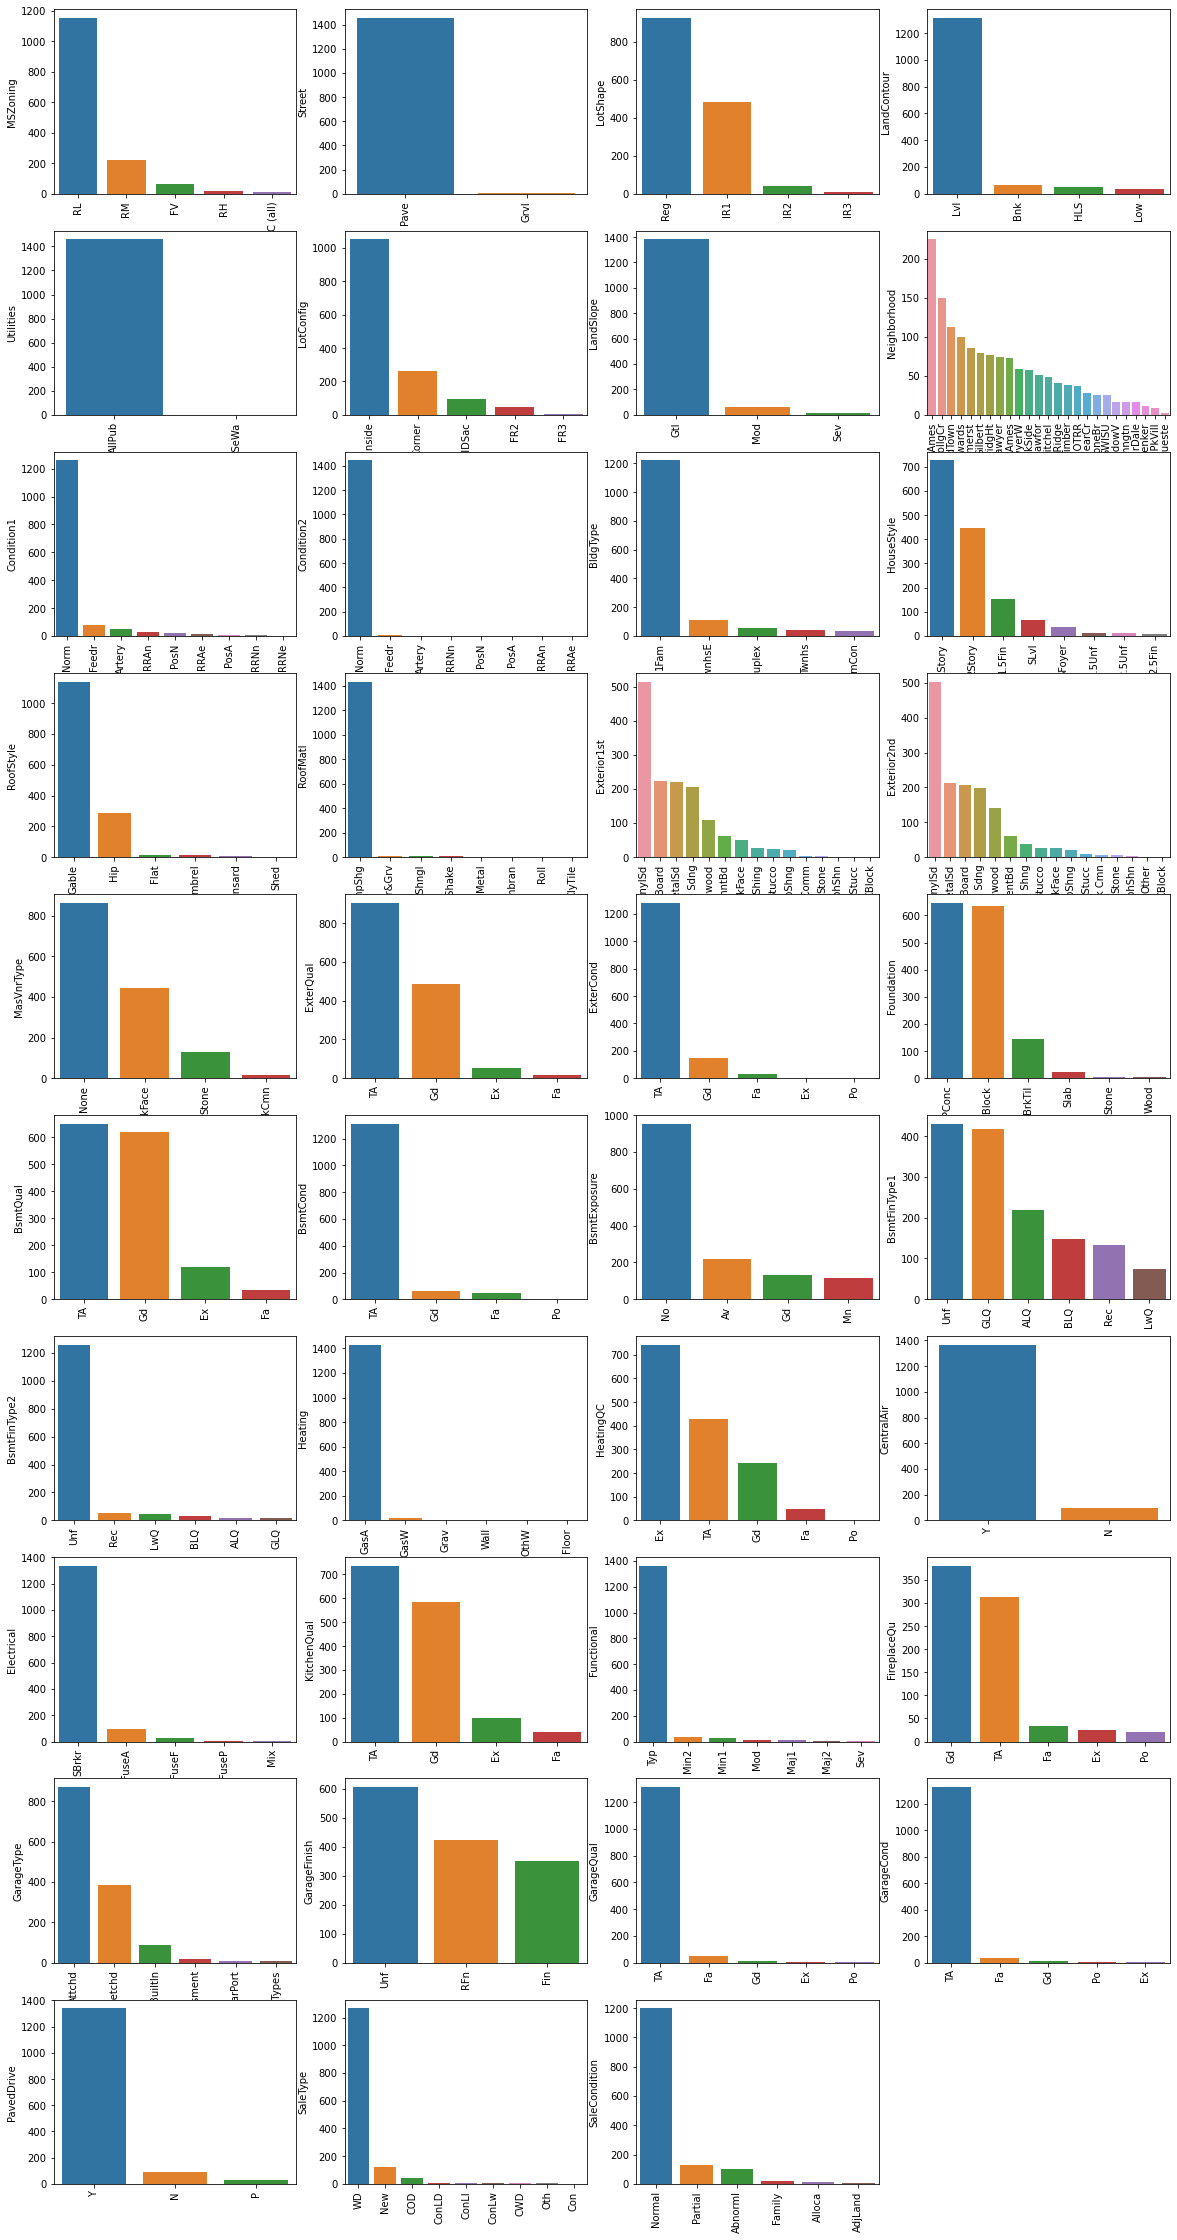

In [15]:
plt.figure(figsize=(20,40))
plt.title("Categorial feature values plotted on bar graph")
plt.xticks(rotation=90)
index =1 
for col in object_cols:
    y = housing_data[col].value_counts()
    plt.subplot(10,4,index)
    plt.xticks(rotation=90)
    sns.barplot(x=list(y.index),y=y)
    index+=1

In [16]:
print('Contents of column Utilities: ',housing_data.Utilities.unique())

Contents of column Utilities:  ['AllPub' 'NoSeWa']


In [17]:
#checking percentage wise null values per column
missingvalue = round((housing_data.isnull().sum() / len(housing_data.index))*100,2)
missingvalue[missingvalue >0]

LotFrontage     17.74
MasVnrType       0.55
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
Electrical       0.07
FireplaceQu     47.26
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
dtype: float64

#### Fill up missing values:

1.  Drop the features 'id' as it is only used as a indexing or identification purpose.

2.  Drop 'Utilities' feature, as all but one have the value 'AllPub'

3.  If 'Fireplaces' = 0 then then we have missing entries for 'FirePlaceQu'. Hence fill missing values with 'NA'.

4.  Basement features: Filling missing values with 'NA' or '0'.

5.  Garage features: Filling missing values with 'NA' or '0'.

6.  Remaining Integer and Real features: filling up missing values with mean of the corresponding feature.

7.  Remaining Categorical features: filling up missing values with mode of the corresponding feature.

In [18]:
## Dropping of 'id' and 'Utilities' from the data set 
housing_data = housing_data.drop(['Id','Utilities'],axis=1)

## following columns 'MasVnrType', 'MasVnrArea', 'Electrical' are mainly categorical, so replacing the missing values with the columns mode values
housing_data['Electrical'] = housing_data['Electrical'].fillna(housing_data['Electrical'].mode()[0])
housing_data['MasVnrType'] = housing_data['MasVnrType'].fillna(housing_data['MasVnrType'].mode()[0])
housing_data['MasVnrArea'] = housing_data['MasVnrArea'].fillna(housing_data['MasVnrArea'].mode()[0])

## 'LotFrontage' is numerical column, filling up the missing values with mean values of the column data
housing_data['LotFrontage'] = housing_data['LotFrontage'].fillna(housing_data['LotFrontage'].mean())

## 'FirePlaceQu' is categorical value, filling up the missing values with 'NA'
housing_data['FireplaceQu'] = housing_data['FireplaceQu'].fillna('NA')

## all the basement features above with missing values are of categorical type, so filling up the missing values with 'NA'
housing_data['BsmtQual'] = housing_data['BsmtQual'].fillna('NA')
housing_data['BsmtCond'] = housing_data['BsmtCond'].fillna('NA')
housing_data['BsmtExposure'] = housing_data['BsmtExposure'].fillna('NA')
housing_data['BsmtFinType1'] = housing_data['BsmtFinType1'].fillna('NA')
housing_data['BsmtFinType2'] = housing_data['BsmtFinType2'].fillna('NA')

## all the garage related features except 'GarageYrBlt' are of categorical type so filling with 'NA'
housing_data['GarageType'] = housing_data['GarageType'].fillna('NA')
housing_data['GarageFinish'] = housing_data['GarageFinish'].fillna('NA')
housing_data['GarageCond'] = housing_data['GarageCond'].fillna('NA')
housing_data['GarageQual'] = housing_data['GarageQual'].fillna('NA')
housing_data['GarageYrBlt'] = housing_data['GarageYrBlt'].fillna(housing_data['GarageYrBlt'].mean())

In [19]:
housing_data.shape

(1460, 75)

In [20]:
#checking percentage wise null values per column
missingvalue = round((housing_data.isnull().sum() / len(housing_data.index))*100,2)
missingvalue[missingvalue >0]

Series([], dtype: float64)

So, now there is no missing value observed in the dataset.

#### Checking for distribution of the Numerical columns

In [21]:
# removing 'Id' column as it is used only for indexing purpose and removing ultilites as it is already dropped from data
numerical_cols.remove('Id')
object_cols.remove('Utilities')

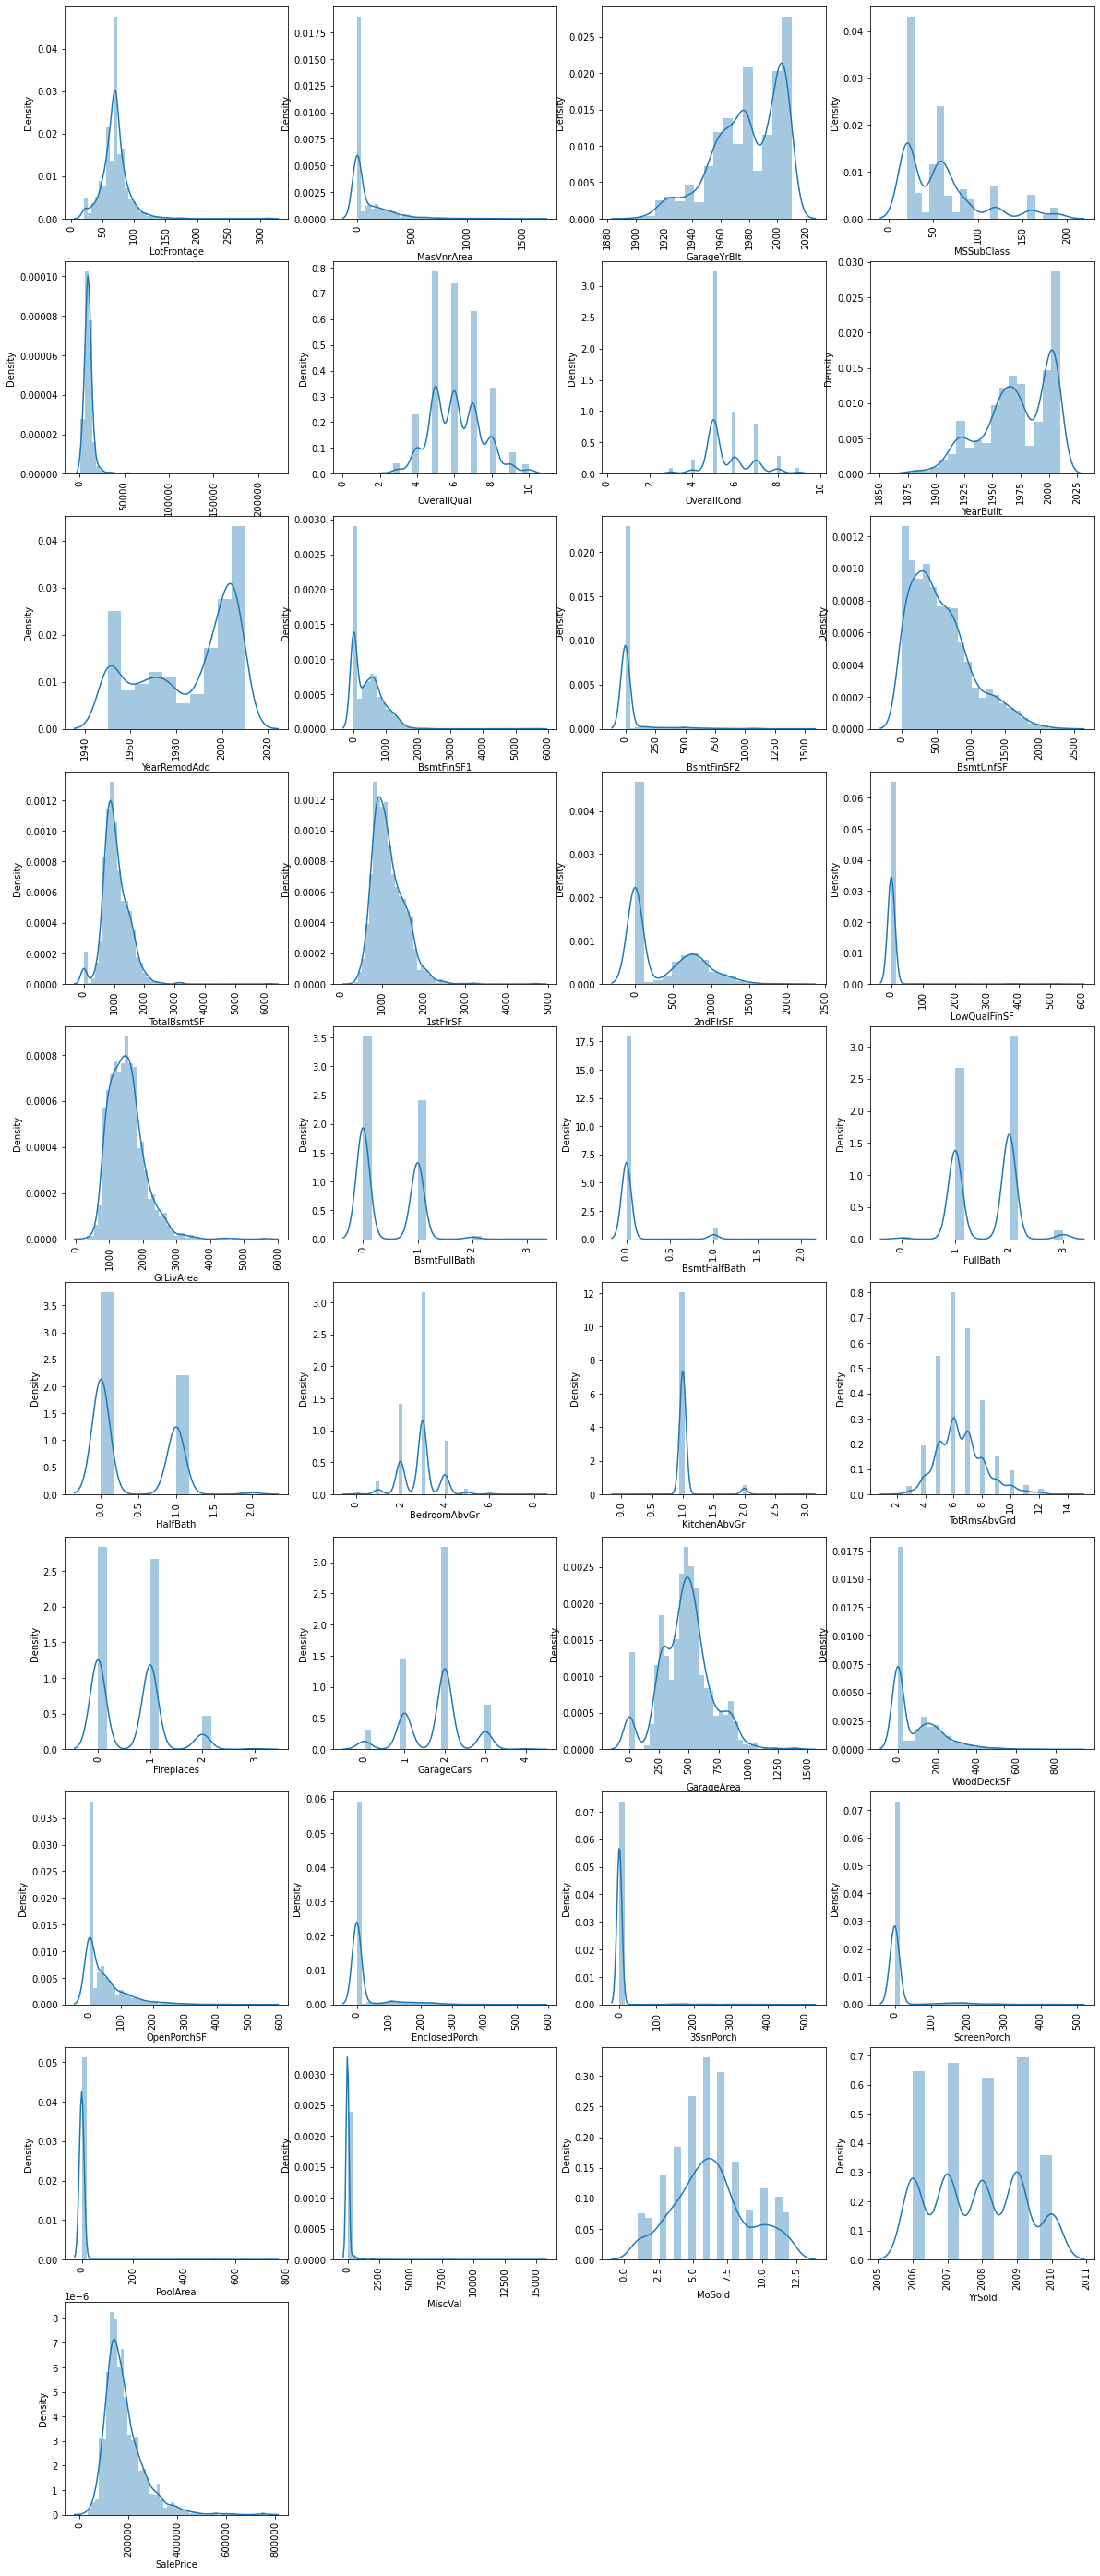

In [22]:
# visualizing all the integer type features using distribution plot
plt.figure(figsize=(20,50))
plt.title("Distribution plot of numerical features")
plt.xticks(rotation=90)
index=1
for cols in numerical_cols:
    plt.subplot(10,4,index)
    plt.xticks(rotation=90)
    sns.distplot(housing_data[cols])
    index+=1

__From the distribution plots we can clearly see that there are lots of numerical features whose values are right or left skewed. This skewed values can influence performance result in further analysis so we will be log transforming the values to get a normally distribution of values.__

In [23]:
# making a list of columns which are postively or negatively skewed
skewed_columns = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt', 'MSSubClass', 'LotArea', 
                  'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 
                  'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 
                  'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 
                  'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 
                  'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
skewed_columns

['LotFrontage',
 'MasVnrArea',
 'GarageYrBlt',
 'MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [24]:
# Transforming the columns with logarithmic transformation
for cols in skewed_columns:
    housing_data[cols] = np.log(housing_data[cols]+1) # as some of column have 0 value adding 1 to log value to avoid NaN

### Numerical data distribution plot after log transformation

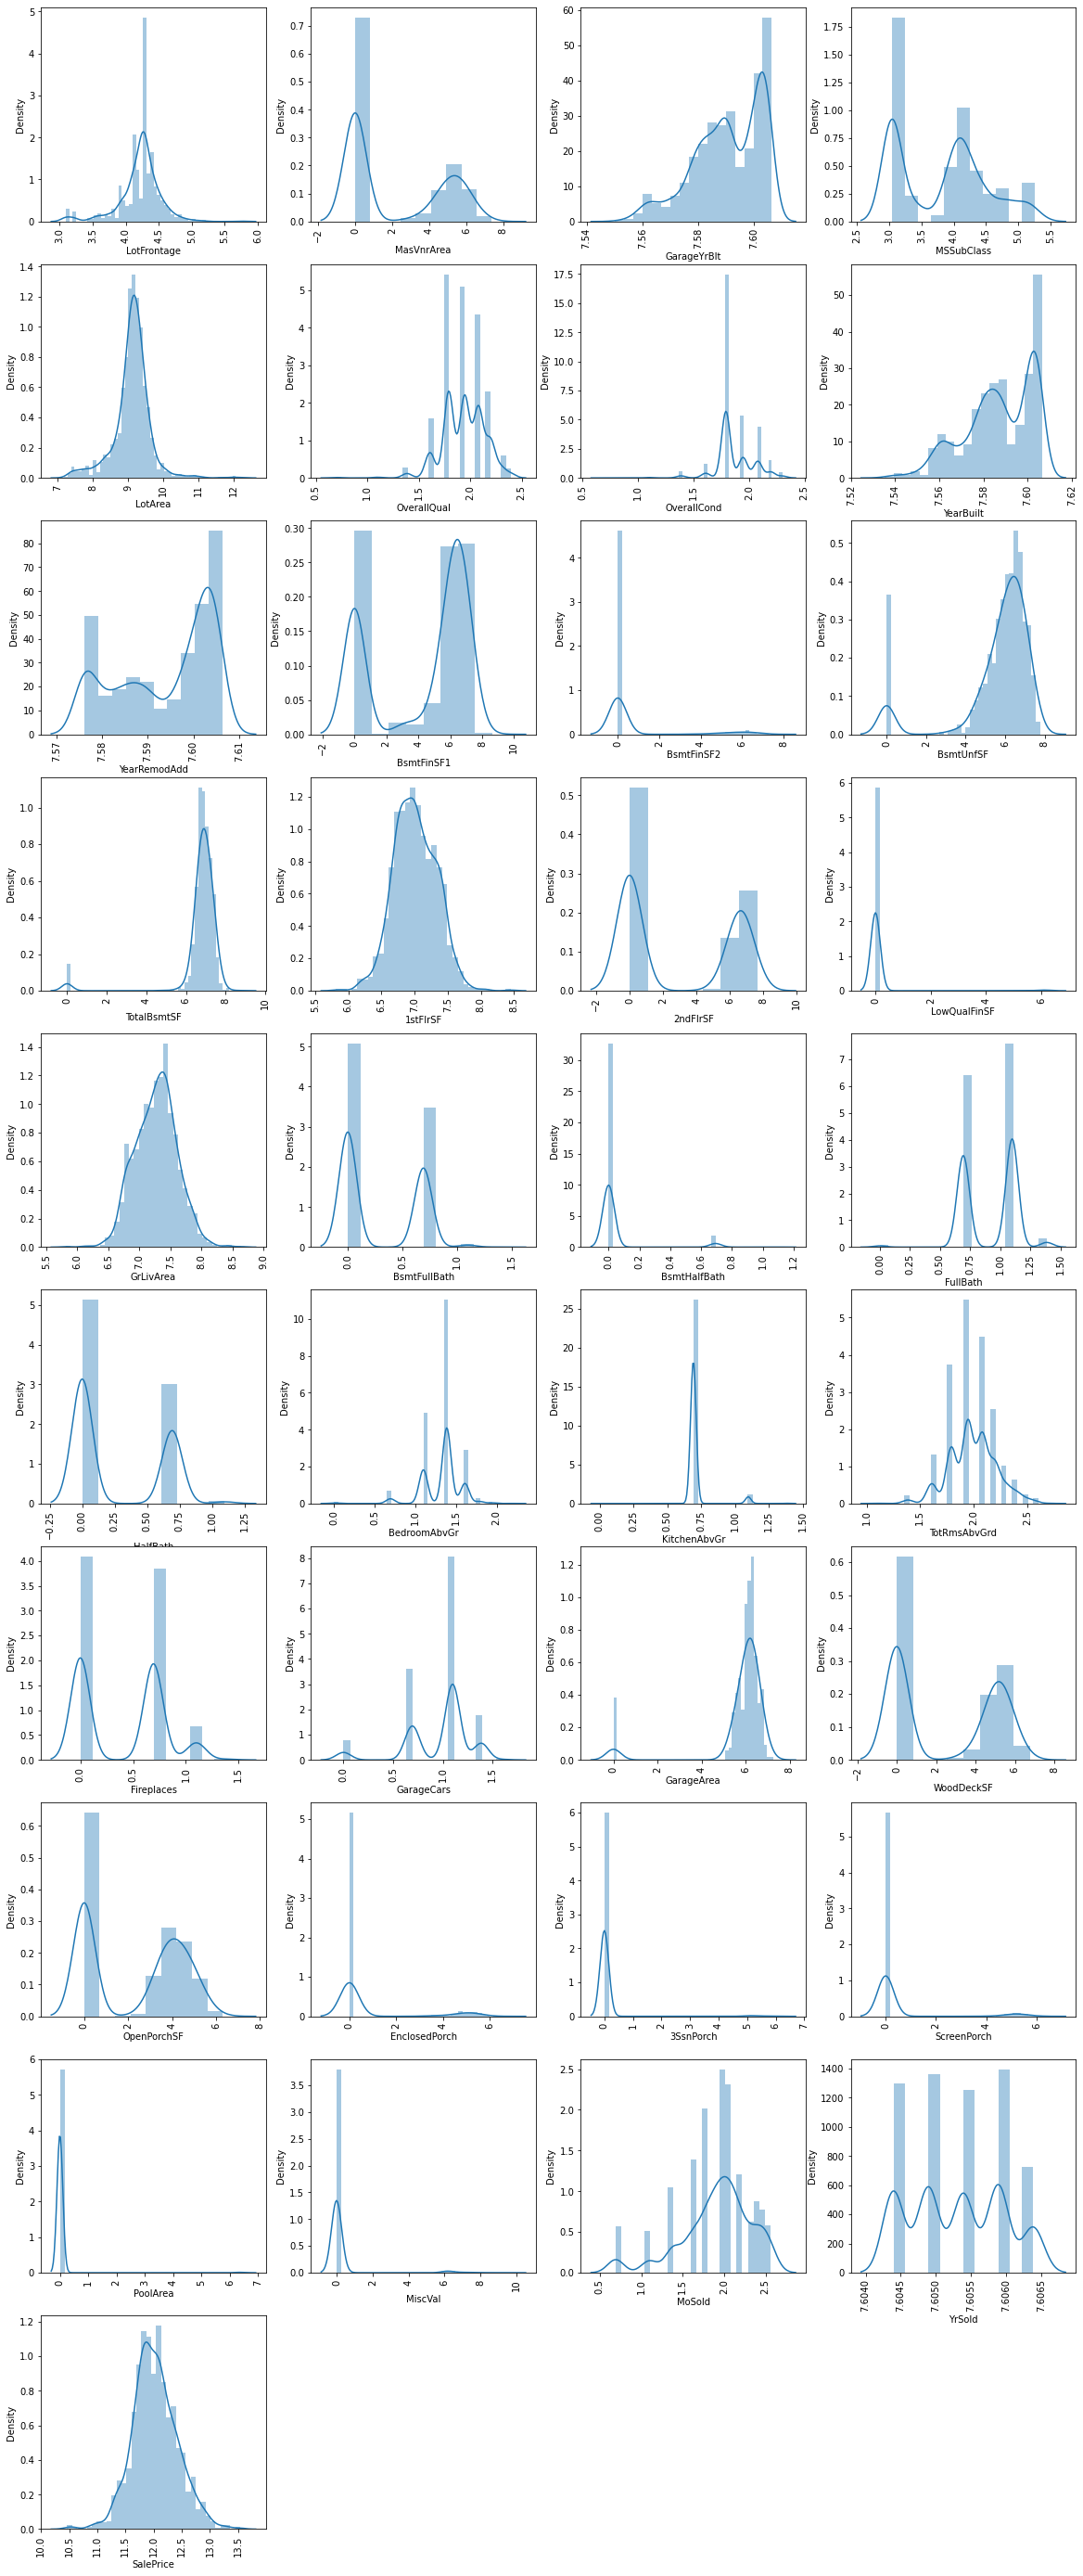

In [25]:
# visualizing all the integer type features using distribution plot
plt.figure(figsize=(20,50))
plt.title("Distribution plot of numerical features")
plt.xticks(rotation=90)
index=1
for cols in numerical_cols:
    plt.subplot(10,4,index)
    plt.xticks(rotation=90)
    sns.distplot(housing_data[cols])
    index+=1

#### Box plotting to check the outliers present in data

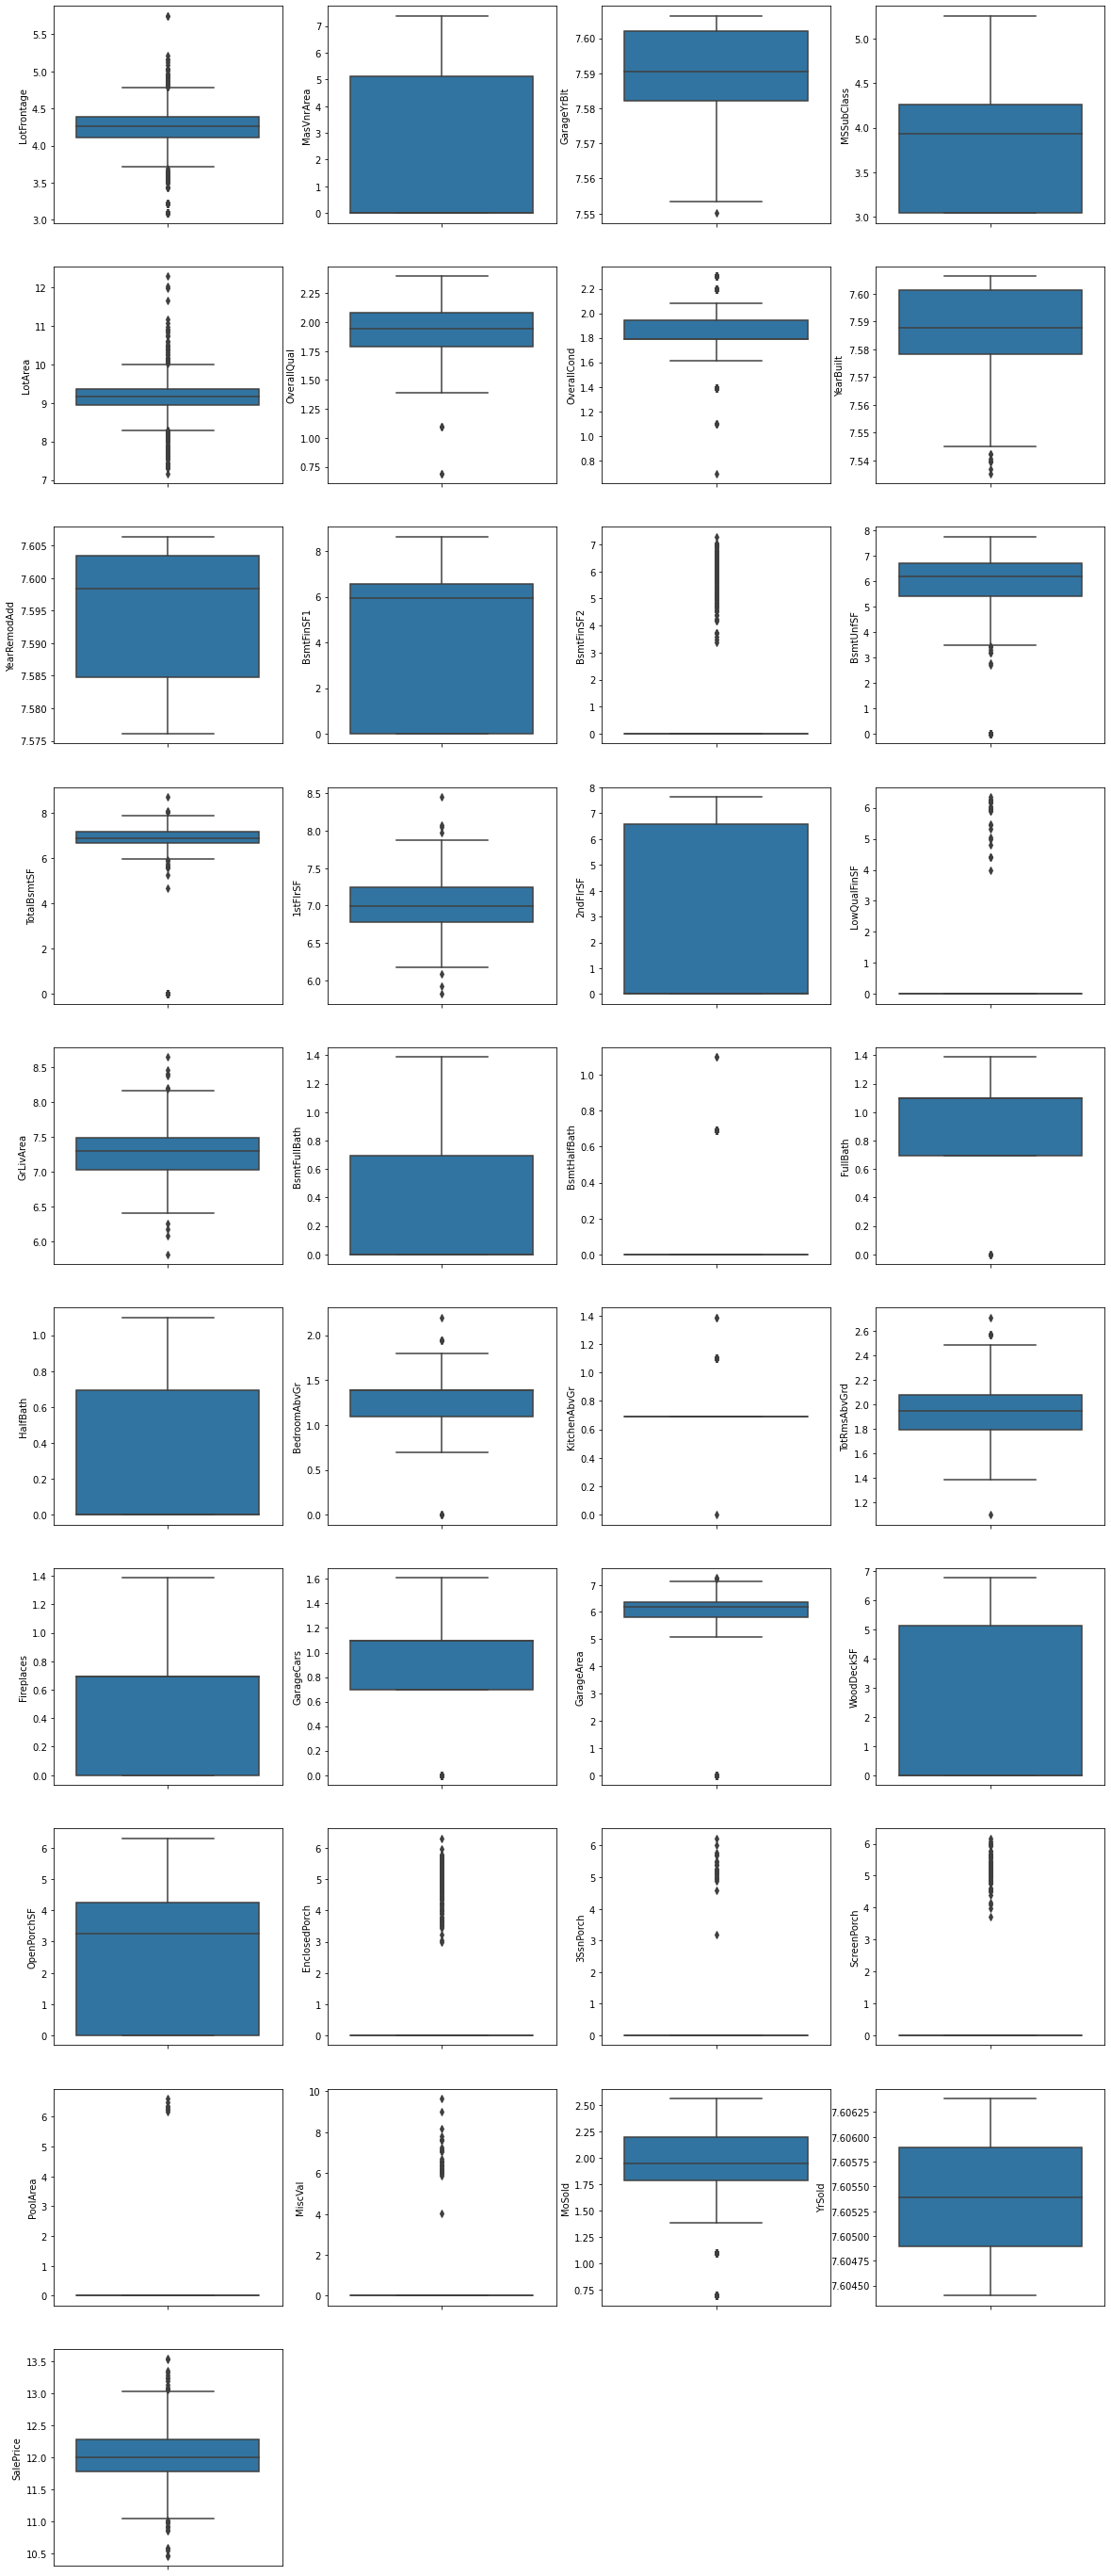

In [26]:
# visualizing all the integer type features using boxplot
plt.figure(figsize=(20,50))
plt.title("Box plot of numerical features")
plt.xticks(rotation=90)
index=1
for cols in numerical_cols:
    plt.subplot(10,4,index)
    plt.xticks(rotation=90)
    sns.boxplot(y=cols,data=housing_data)
    index+=1

In [27]:
# integer type features data description based on different percentiles
housing_data[numerical_cols].describe(percentiles=[.10,.15,.20,.75,.80,.90,.95,.97,.99])

,LotFrontage,MasVnrArea,GarageYrBlt,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,4.217092,2.120264,7.590529,3.818794,9.110966,1.940309,1.869266,7.586821,7.593756,4.229731,0.655398,5.648378,6.750560,7.008452,2.864586,0.099814,7.268512,0.291395,0.039486,0.917827,0.263025,1.327943,0.711673,1.994407,0.399875,0.972599,5.808156,2.457206,2.308541,0.698019,0.085679,0.410671,0.030431,0.233456,1.910828,7.605300,12.024057
std,0.314733,2.628759,0.012172,0.688354,0.517369,0.201983,0.168400,0.015389,0.010424,2.992052,1.845045,1.854020,1.145712,0.317431,3.293311,0.747354,0.333303,0.349839,0.162599,0.223281,0.341869,0.229907,0.089268,0.214246,0.394660,0.322269,1.455118,2.596435,2.152387,1.727317,0.666876,1.403194,0.438685,1.226030,0.425540,0.000661,0.399449
min,3.091042,0.000000,7.550135,3.044522,7.170888,0.693147,0.693147,7.535297,7.576097,0.000000,0.000000,0.000000,0.000000,5.814131,0.000000,0.000000,5.814131,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.098612,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,7.604396,10.460271
10%,3.912023,0.000000,7.575072,3.044522,8.517393,1.791759,1.791759,7.563149,7.576097,0.000000,0.000000,4.329409,6.458181,6.630551,0.000000,0.000000,6.816736,0.000000,0.000000,0.693147,0.000000,1.098612,0.693147,1.791759,0.000000,0.693147,5.484797,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.386294,7.604396,11.575675
15%,3.951244,0.000000,7.578145,3.044522,8.719481,1.791759,1.791759,7.568896,7.578657,0.000000,0.000000,4.810960,6.554930,6.690842,0.000000,0.000000,6.896694,0.000000,0.000000,0.693147,0.000000,1.098612,0.693147,1.791759,0.000000,0.693147,5.612029,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.609438,7.604396,11.652696
20%,4.094345,0.000000,7.580189,3.044522,8.864944,1.791759,1.791759,7.574969,7.582127,0.000000,0.000000,5.153292,6.629099,6.744059,0.000000,0.000000,6.973168,0.000000,0.000000,0.693147,0.000000,1.098612,0.693147,1.791759,0.000000,0.693147,5.692381,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.609438,7.604396,11.728045
50%,4.263383,0.000000,7.590603,3.931826,9.156887,1.945910,1.791759,7.587817,7.598399,5.951943,0.000000,6.170651,6.900227,6.992096,0.000000,0.000000,7.289611,0.000000,0.000000,1.098612,0.000000,1.386294,0.693147,1.945910,0.693147,1.098612,6.175867,0.000000,3.258097,0.000000,0.000000,0.000000,0.000000,0.000000,1.945910,7.605392,12.001512
75%,4.382027,5.107456,7.601902,4.262680,9.358976,2.079442,1.945910,7.601402,7.603399,6.569832,0.000000,6.695799,7.169542,7.238676,6.591674,0.000000,7.483104,0.693147,0.000000,1.098612,0.693147,1.386294,0.693147,2.079442,0.693147,1.098612,6.357842,5.129899,4.234107,0.000000,0.000000,0.000000,0.000000,0.000000,2.197225,7.605890,12.273736
80%,4.394449,5.328845,7.602900,4.394449,9.409748,2.079442,2.079442,7.602900,7.603898,6.693819,0.000000,6.799056,7.238640,7.302092,6.681105,0.000000,7.533694,0.693147,0.000000,1.098612,0.693147,1.386294,0.693147,2.197225,0.693147,1.098612,6.431653,5.262690,4.433184,0.000000,0.000000,0.000000,0.000000,0.000000,2.197225,7.605890,12.345839


In [28]:
# following columns have mostly zero values with some outliers present as Max values
columnsToBeDropped = ['LowQualFinSF','3SsnPorch','PoolArea','EnclosedPorch','ScreenPorch','MiscVal','BsmtHalfBath']

# As for all the columns median is set to zero we will be dropping these columns
housing_data = housing_data.drop(columnsToBeDropped,axis=1)
housing_data.shape

(1460, 68)

In [29]:
# taking a list of columns which have outliers present
outliers = ['OverallQual', 'OverallCond','BsmtUnfSF', 'TotalBsmtSF','FullBath', 'BedroomAbvGr', 'KitchenAbvGr', 'GarageCars', 'GarageArea']


In [30]:
# Based of IQR values we are removing outliers from the data 
for cols in outliers:
    # Quantile 1 set at 15%
    Q1 = housing_data[cols].quantile(0.15)
    # Quantile 3 set at 97%
    Q3 = housing_data[cols].quantile(0.95)   
    # Calculating the IQRR value
    IQR  = Q3 - Q1   
    # removing the data which are not in following range
    housing_data = housing_data[~((housing_data[cols] < (Q1 - 1.5 * IQR)) |(housing_data[cols] > (Q3 + 1.5 * IQR)))]

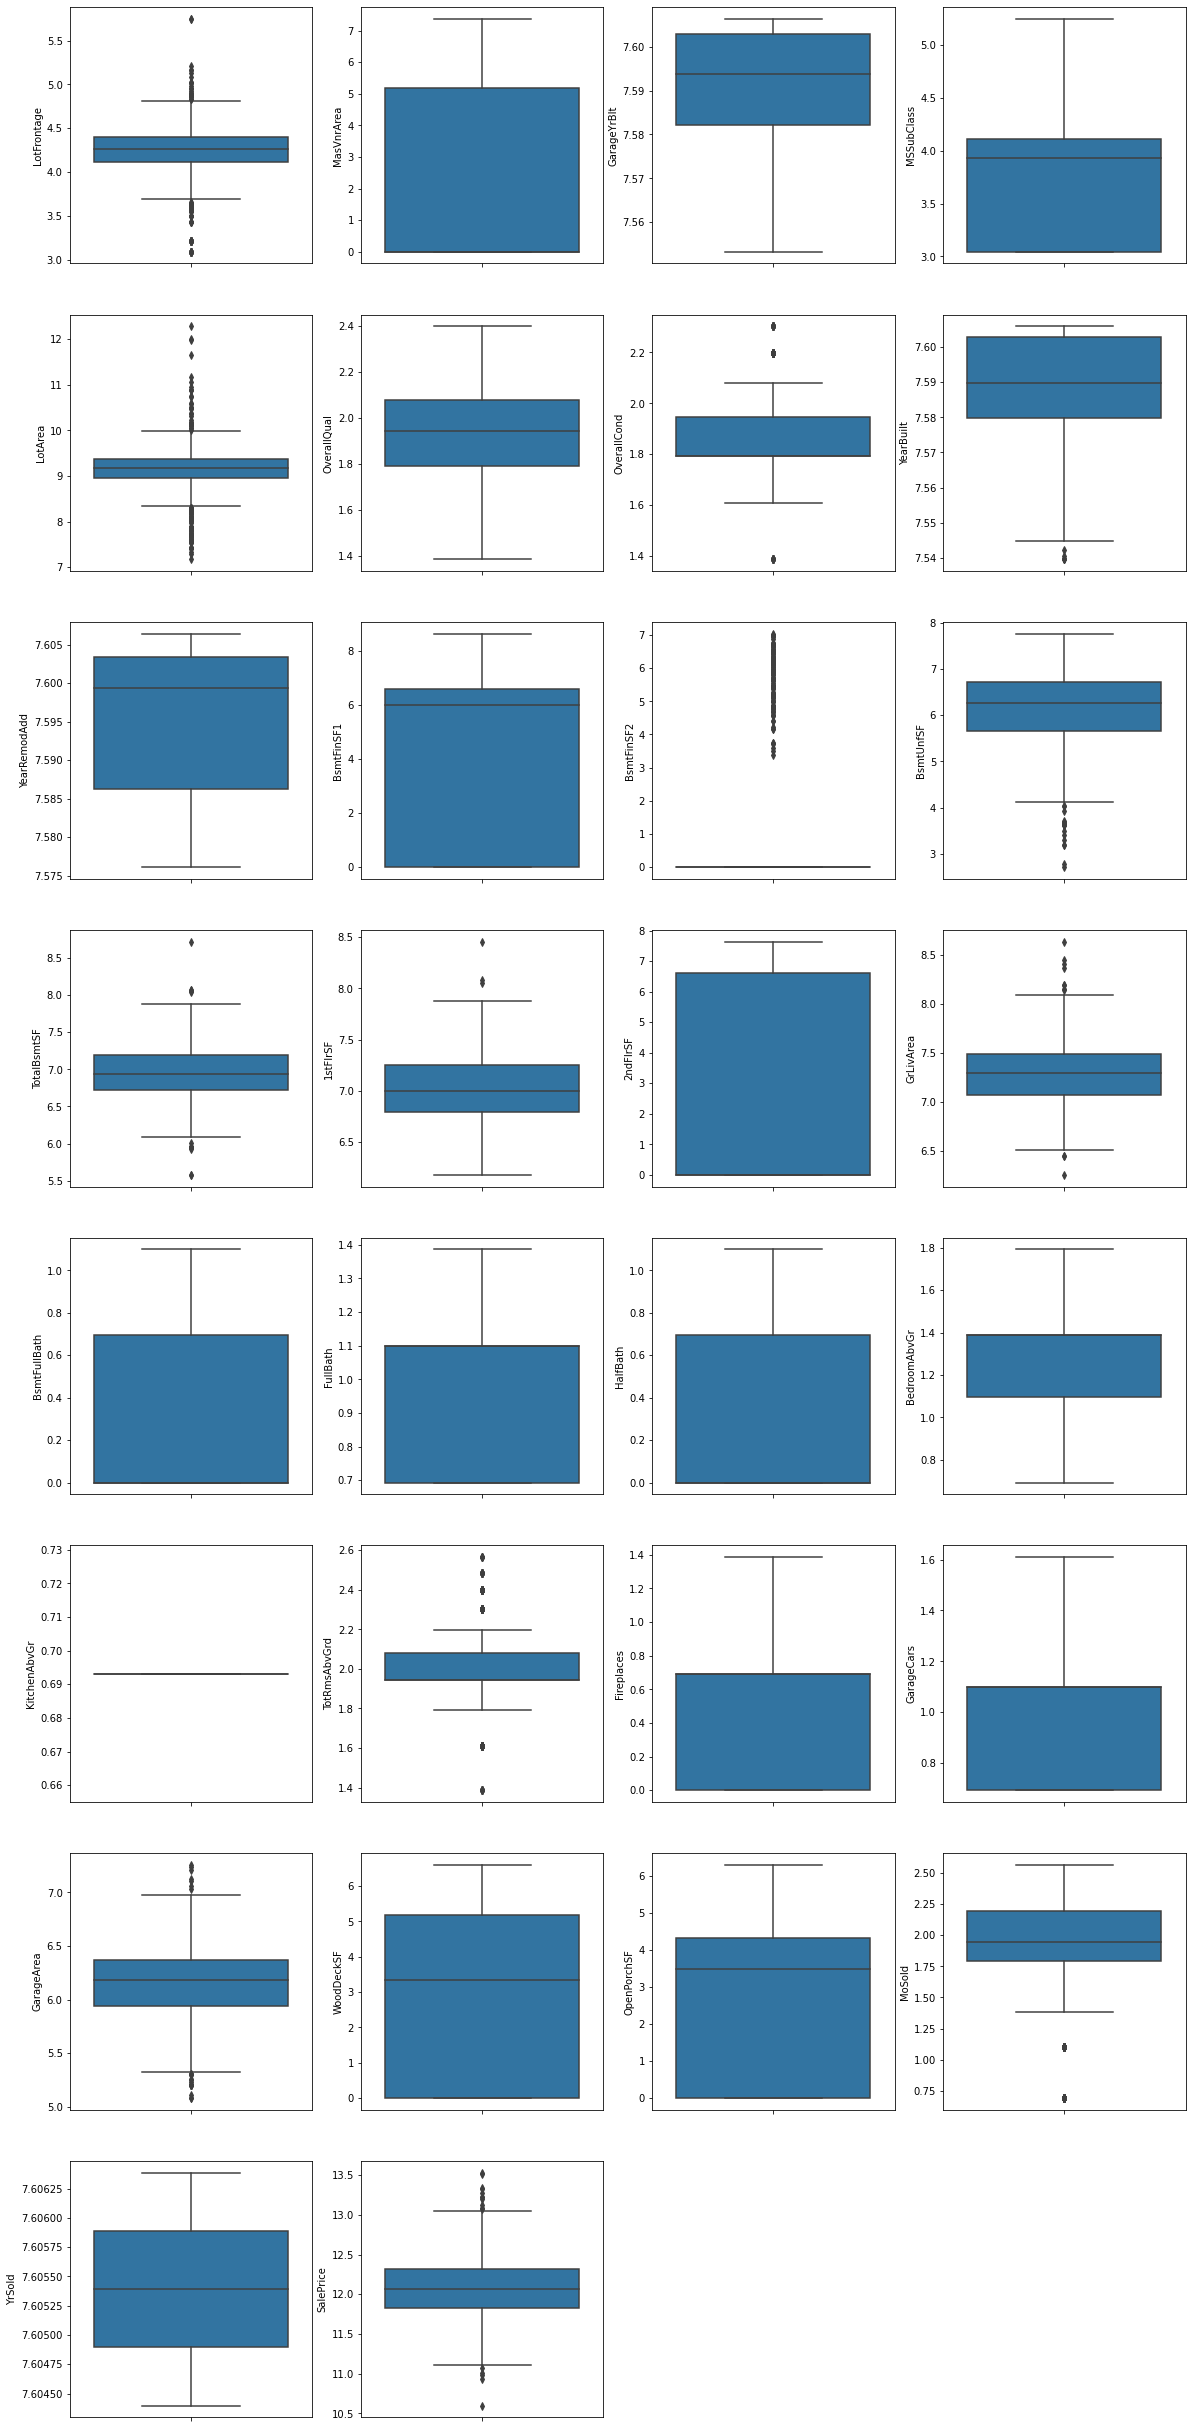

In [31]:
# removing the deleted features from integer type columns list
numerical_cols.remove('LowQualFinSF')
numerical_cols.remove('3SsnPorch')
numerical_cols.remove('PoolArea')
numerical_cols.remove('MiscVal')
numerical_cols.remove('ScreenPorch')
numerical_cols.remove('EnclosedPorch')
numerical_cols.remove('BsmtHalfBath')

# visualizing all the integer type features using boxplot
plt.figure(figsize=(20,50))
plt.title("Box plot of numerical features")
plt.xticks(rotation=90)
index=1
for cols in numerical_cols:
    plt.subplot(9,4,index)
    plt.xticks(rotation=90)
    sns.boxplot(y=cols,data=housing_data)
    index+=1

In [32]:
# Correlation of all the features in the data set
correlation = housing_data.corr()
correlation

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.415228,-0.399867,0.147886,-0.056823,0.056640,0.081696,0.024264,-0.095869,-0.114457,-0.140847,-0.395156,-0.383557,0.582769,0.197960,-0.066456,0.172855,0.360599,-0.029965,NaN,0.093632,0.063274,0.079243,0.028963,-0.059920,0.071177,0.055677,0.024500,-0.029968,0.007740
LotFrontage,-0.415228,1.000000,0.643750,0.188987,-0.020479,0.083314,0.061122,0.101521,0.078991,0.056949,0.096034,0.351263,0.425253,-0.075645,0.310087,0.086080,0.140113,0.005842,0.287376,NaN,0.334602,0.233550,0.046700,0.247768,0.307147,0.058775,0.141863,0.018313,0.005527,0.358913
LotArea,-0.399867,0.643750,1.000000,0.143581,0.022596,-0.010602,0.017007,0.054326,0.087805,0.094256,0.040747,0.369015,0.456645,-0.021779,0.378653,0.132959,0.158641,0.017294,0.313958,NaN,0.386592,0.316909,-0.024857,0.237638,0.294539,0.120177,0.146930,0.005003,-0.015118,0.396779
OverallQual,0.147886,0.188987,0.143581,1.000000,-0.167150,0.570679,0.541811,0.389794,-0.022932,-0.141192,0.220697,0.455945,0.446138,0.201741,0.637409,0.084489,0.632917,0.251062,0.111019,NaN,0.484599,0.383860,0.536788,0.595371,0.528729,0.260574,0.431951,0.061893,-0.013625,0.791732
OverallCond,-0.056823,-0.020479,0.022596,-0.167150,1.000000,-0.428846,0.010274,-0.172591,0.035580,0.067997,-0.125235,-0.211774,-0.128865,0.028867,-0.123262,-0.074714,-0.237437,-0.065917,0.026413,NaN,-0.049961,-0.055356,-0.353430,-0.256723,-0.224084,-0.081025,-0.160656,0.014272,0.046376,-0.093103
YearBuilt,0.056640,0.083314,-0.010602,0.570679,-0.428846,1.000000,0.618445,0.382445,0.100462,-0.099341,0.052682,0.388354,0.259582,-0.048318,0.259921,0.170593,0.566821,0.215864,-0.054059,NaN,0.158259,0.117920,0.836504,0.561786,0.518067,0.301761,0.425837,-0.009487,0.003464,0.564783
YearRemodAdd,0.081696,0.061122,0.017007,0.541811,0.010274,0.618445,1.000000,0.200752,-0.042078,-0.126431,0.091801,0.254805,0.238769,0.072702,0.332183,0.098664,0.519989,0.162755,-0.051275,NaN,0.226252,0.083633,0.638428,0.488179,0.424043,0.272680,0.390214,0.013820,0.033348,0.559698
MasVnrArea,0.024264,0.101521,0.054326,0.389794,-0.172591,0.382445,0.200752,1.000000,0.169379,-0.083206,0.053013,0.328930,0.328486,-0.027779,0.296534,0.118204,0.276679,0.121162,0.062639,NaN,0.238789,0.216165,0.302866,0.356357,0.347313,0.155700,0.212737,-0.006130,0.018859,0.391296
BsmtFinSF1,-0.095869,0.078991,0.087805,-0.022932,0.035580,0.100462,-0.042078,0.169379,1.000000,0.163075,-0.629712,0.247857,0.210723,-0.219585,-0.024301,0.590376,-0.082243,-0.048311,-0.089042,NaN,-0.079186,0.102017,0.003974,0.014090,0.088383,0.041658,0.006990,-0.034381,0.068306,0.149197
BsmtFinSF2,-0.114457,0.056949,0.094256,-0.141192,0.067997,-0.099341,-0.126431,-0.083206,0.163075,1.000000,-0.243432,0.073004,0.082148,-0.121364,-0.048652,0.129851,-0.108710,-0.068380,0.019671,NaN,-0.040065,0.051823,-0.122736,-0.075232,-0.022168,0.016238,-0.061577,-0.006167,0.023455,-0.058696


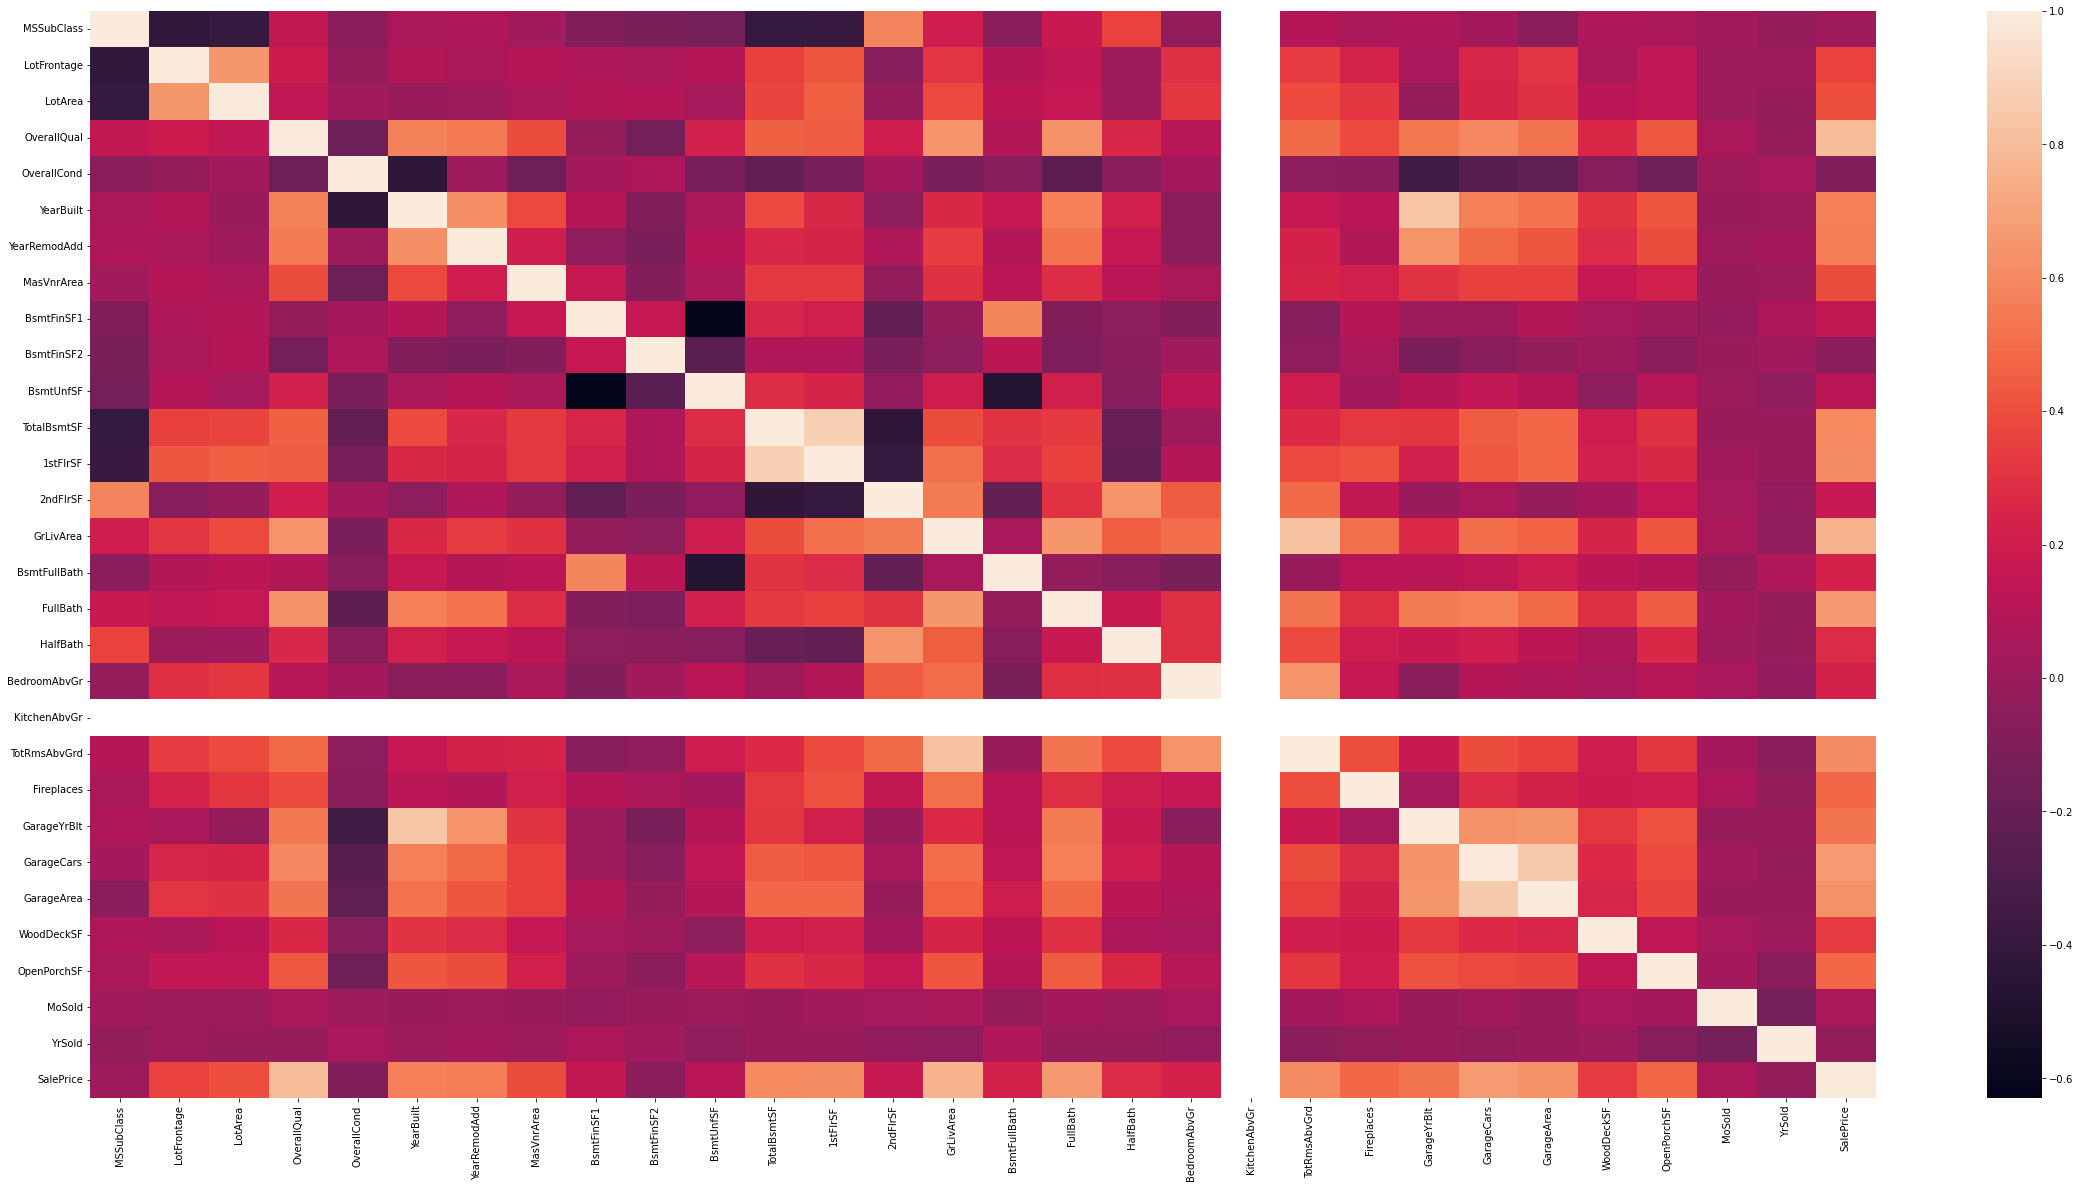

In [33]:
#plotting the heatmap based on the above correlation
plt.figure(figsize=(40,20))
sns.heatmap(correlation)
plt.show()

In [34]:
# filtering out the top features which have more that 20% correlativity with target feature 'SalePrice'
top_feature_columns = correlation['SalePrice'][correlation['SalePrice'].values > 0.2].index.values
top_feature_columns

array(['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'SalePrice'], dtype=object)

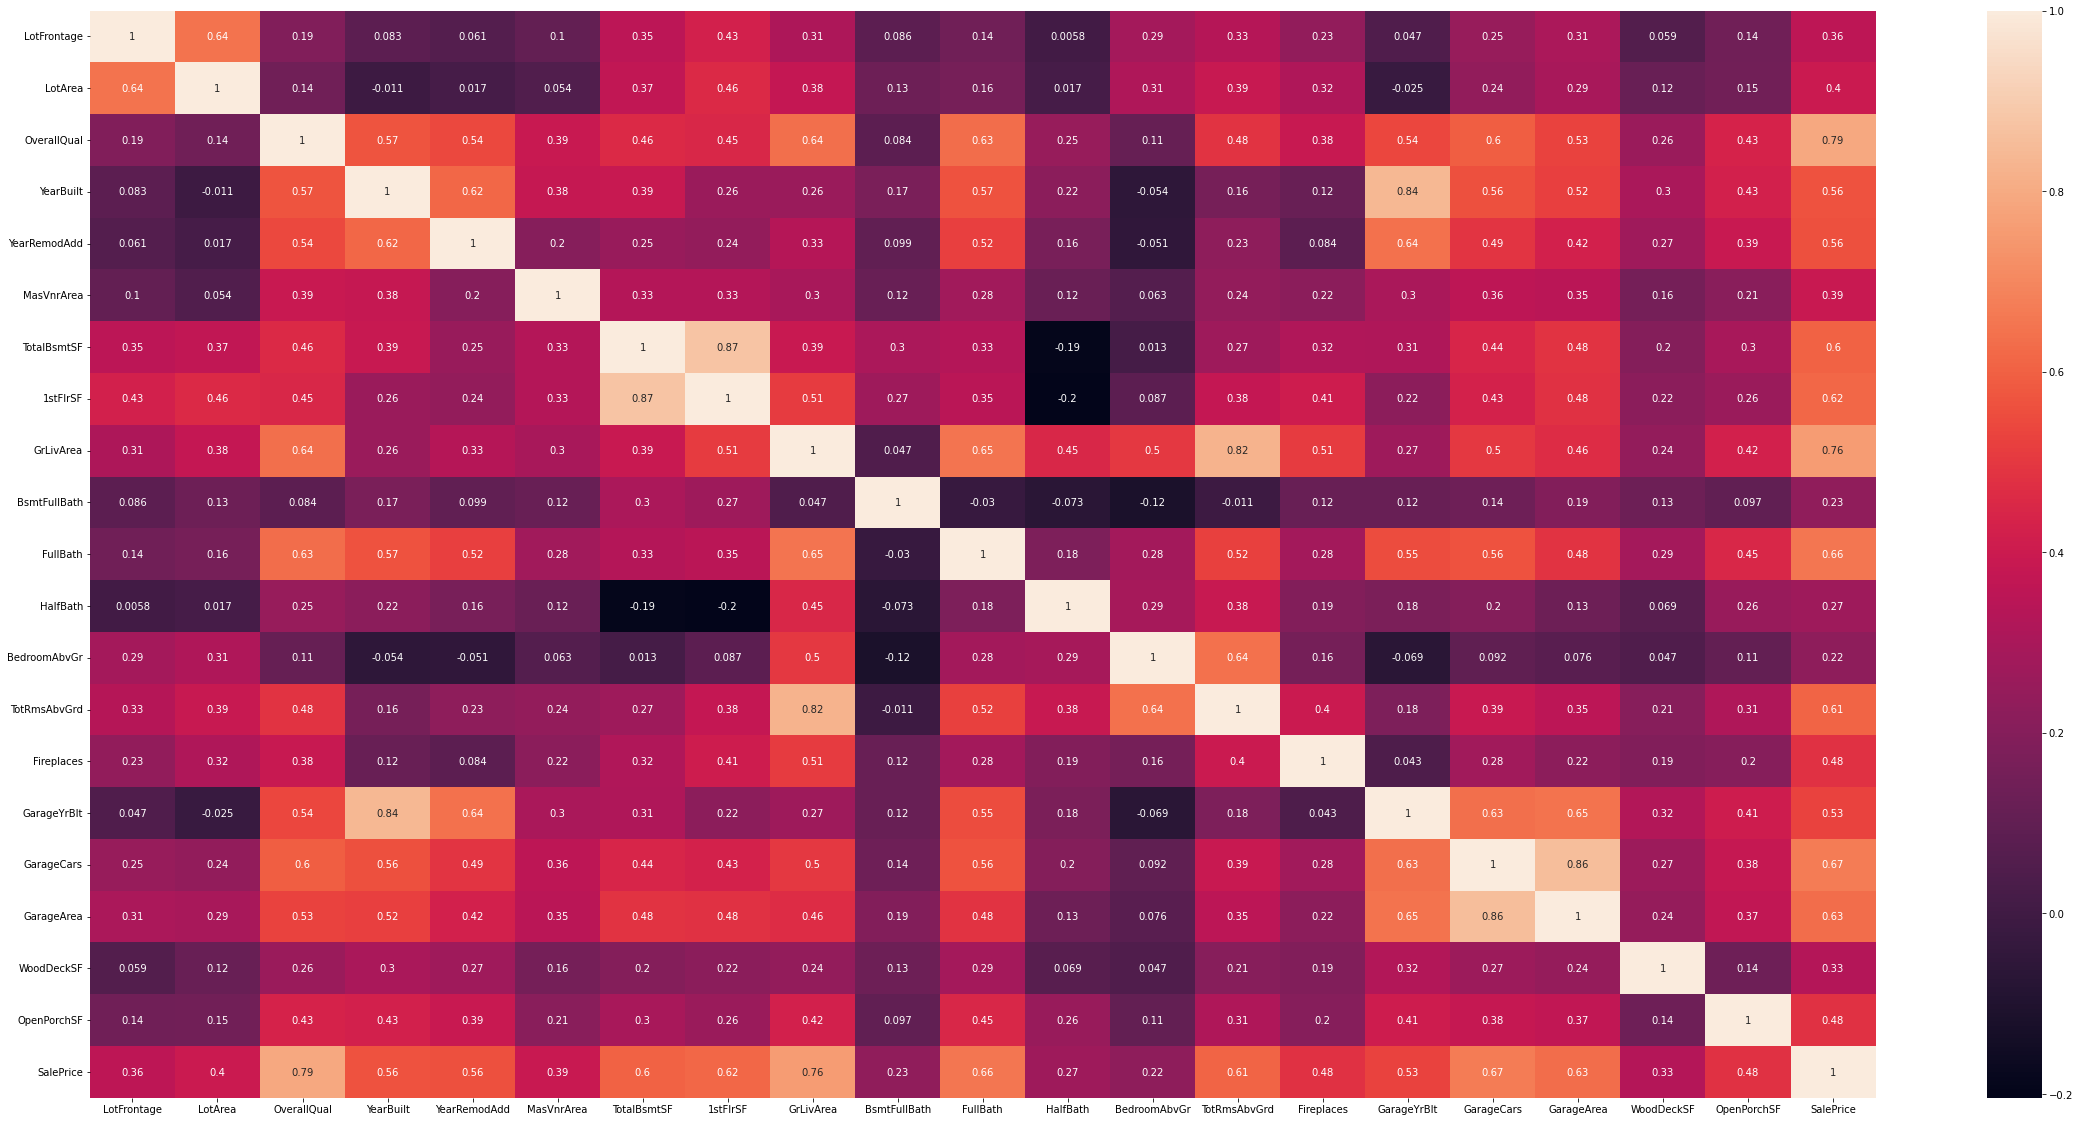

In [35]:
#plotting the heatmap for the top correlated features
plt.figure(figsize=(40,20))
sns.heatmap(housing_data[top_feature_columns].corr(),annot=True)
plt.show()

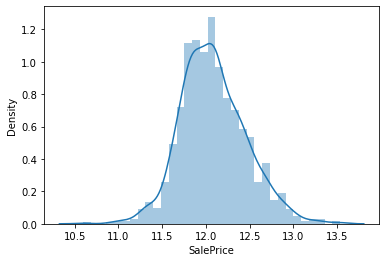

In [36]:
#plotting the distribution of the target variable 'SalePrice'
sns.distplot(housing_data.SalePrice)
plt.show()

### 3. Data preparation for Model Building

__Create dummy variables for the categorical variables__

In [37]:
# dummy variables created for all the categorical type of features

housing_data = pd.get_dummies(data=housing_data, columns=object_cols,drop_first=True)

In [38]:
housing_data.shape

(1230, 219)

### 4. Model Building

#### 4.1 Split the data in to train and test sets

In [39]:
# target variable 'SalePrice'
y = housing_data.pop('SalePrice')

# all the independent variables
X = housing_data

In [40]:
# Spliting the data into train and test in 7:3 ratio
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,train_size=0.75,random_state=100)

print(" X Train set shape:",X_train.shape)
print(" X Test set shape:",X_test.shape)
print(" y Train set shape:",y_train.shape)
print(" y Test set shape:",y_test.shape)

 X Train set shape: (922, 218)
 X Test set shape: (308, 218)
 y Train set shape: (922,)
 y Test set shape: (308,)


In [41]:
# creating Linear Regression Model
lm = LinearRegression()

# fitting the train data into the Linear Model
lm.fit(X_train,y_train)

LinearRegression()

In [42]:
lm.coef_

array([-1.29631058e-02,  6.10894518e-03,  9.22579575e-02,  2.23584469e-01,
        2.59819384e-01,  2.87511356e+00,  1.19463671e+00, -2.68047560e-03,
        1.53376168e-02,  2.05092254e-03, -1.92060547e-02,  1.03106409e-01,
        8.60781202e-02,  1.67092972e-02,  3.50027659e-01,  1.54107884e-02,
        1.16585513e-02, -1.10083474e-02, -6.90553113e-03, -5.30631095e-13,
        2.51175192e-02,  5.59217402e-02, -5.66020749e-01,  7.01154365e-02,
        3.62570320e-02,  1.40075095e-03,  1.82320599e-03, -2.69565593e-03,
       -2.58127861e+00,  4.94324748e-01,  5.72242550e-01,  4.72157502e-01,
        4.51712162e-01,  1.14541562e-01, -7.21269724e-03,  3.18880122e-02,
        4.52709627e-03,  4.66272516e-02, -2.55360803e-02,  4.04227133e-02,
       -2.46538329e-03, -7.41346883e-02, -4.24343172e-02, -2.11110749e-02,
        1.43918186e-02, -5.41320202e-02, -1.56034410e-02, -1.63868965e-03,
        7.22276546e-03,  1.01190761e-02, -3.60780822e-02,  1.16570554e-01,
       -1.09532752e-01, -

In [43]:
# Data contains 219 features so we are using RFE to select top 15 features among those
rfe = RFE(lm,15)

# fitting the data into RFE 
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [44]:
# listing all the features ranking after applying RFE
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 136),
 ('LotFrontage', False, 174),
 ('LotArea', False, 21),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('YearBuilt', True, 1),
 ('YearRemodAdd', True, 1),
 ('MasVnrArea', False, 185),
 ('BsmtFinSF1', False, 152),
 ('BsmtFinSF2', False, 188),
 ('BsmtUnfSF', False, 99),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', False, 141),
 ('2ndFlrSF', False, 142),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 44),
 ('FullBath', False, 128),
 ('HalfBath', False, 167),
 ('BedroomAbvGr', False, 172),
 ('KitchenAbvGr', False, 199),
 ('TotRmsAbvGrd', False, 116),
 ('Fireplaces', False, 77),
 ('GarageYrBlt', True, 1),
 ('GarageCars', False, 101),
 ('GarageArea', False, 41),
 ('WoodDeckSF', False, 195),
 ('OpenPorchSF', False, 192),
 ('MoSold', False, 190),
 ('YrSold', True, 1),
 ('MSZoning_FV', False, 2),
 ('MSZoning_RH', False, 4),
 ('MSZoning_RL', False, 3),
 ('MSZoning_RM', False, 5),
 ('Street_Pave', False, 40),
 ('LotShape_IR2', False, 155),
 ('LotShape_IR3', Fals

In [45]:
# top 15 features selected by RFE
top_cols = X_train.columns[rfe.support_]
top_cols

Index(['OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'TotalBsmtSF', 'GrLivArea', 'GarageYrBlt', 'YrSold', 'Condition2_PosN',
       'RoofMatl_CompShg', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake',
       'RoofMatl_WdShngl', 'Exterior1st_BrkComm', 'Functional_Sev'],
      dtype='object')

In [46]:
# filtering the train set on 15 selected features 
X_train_rfe = X_train[top_cols]

In [47]:
lr = LinearRegression()

# fitting the linear model on new train set
lr.fit(X_train_rfe,y_train)

LinearRegression()

In [48]:
# using fitted Linear Model to predict target variable

# predicting on train set
y_train_pred = lr.predict(X_train_rfe)

# predicting on test set
y_test_pred = lr.predict(X_test[top_cols])

In [49]:
# Calculating the error terms and metrics on train and test sets

#creating metrics to store the values
metriclm = []

## R2 score of train data
train_r2_lm = r2_score(y_train,y_train_pred)
print("Train data R2 Score:",train_r2_lm)
metriclm.append(train_r2_lm)

## Adjusted R2 score of train data
adjusted_R2_lm = 1 - (1-train_r2_lm)*((922-1)/(922-15-1))
print("Train data Adjusted R2 Score:",adjusted_R2_lm)
metriclm.append(adjusted_R2_lm)

## R2 score of test data
test_r2_lm = r2_score(y_test,y_test_pred)
print("Test data R2 Score:",test_r2_lm)
metriclm.append(test_r2_lm)

### RSS of train and test data
train_rss_lm = np.sum(np.square(y_train - y_train_pred))
test_rss_lm = np.sum(np.square(y_test - y_test_pred))
print("Residual Sum of Squares Train data:",train_rss_lm)
print("Residual Sum of Squares Train data:",test_rss_lm)
metriclm.append(train_rss_lm)
metriclm.append(test_rss_lm)

### MSE of train and test data
train_mse_lm = mean_squared_error(y_train,y_train_pred)
test_mse_lm = mean_squared_error(y_test,y_test_pred)
print("Mean Sqared Error Train data:",train_mse_lm**0.5)
print("Mean Sqared Error Train data:",test_mse_lm**0.5) 
metriclm.append(train_mse_lm**0.5)
metriclm.append(test_mse_lm**0.5)

Train data R2 Score: 0.8595285478649315
Train data Adjusted R2 Score: 0.8572028615713045
Test data R2 Score: 0.7790322810344368
Residual Sum of Squares Train data: 18.77058997195121
Residual Sum of Squares Train data: 8.427452136635367
Mean Sqared Error Train data: 0.14268341688265437
Mean Sqared Error Train data: 0.1654142000750796


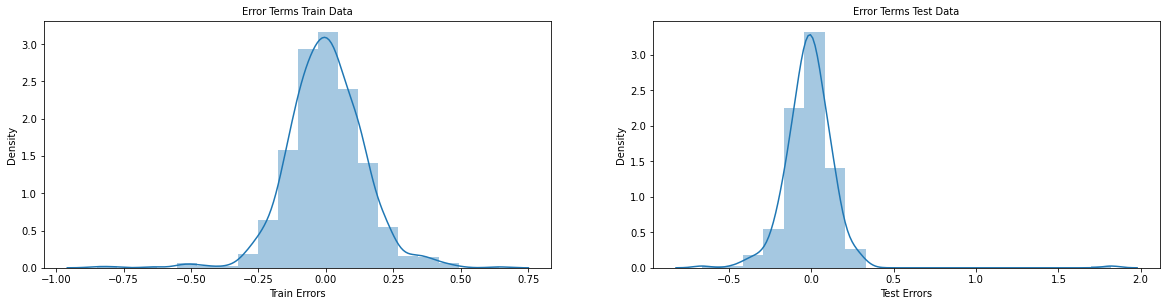

In [50]:
# Ploting the histogram/ distribution of error terms as part of residual analysis
fig = plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
sns.distplot((y_train - y_train_pred), bins = 20)  ### error term = actual target value - predicted target value
plt.title('Error Terms Train Data', fontsize = 10)                  
plt.xlabel('Train Errors', fontsize = 10)    

plt.subplot(2,2,2)
sns.distplot((y_test - y_test_pred), bins = 20)  ### error term = actual target value - predicted target value
plt.title('Error Terms Test Data', fontsize = 10)                  
plt.xlabel('Test Errors', fontsize = 10)    

plt.show()

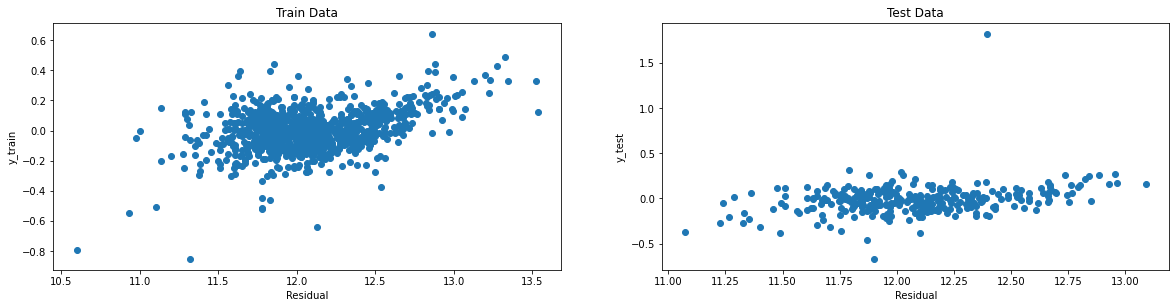

In [51]:
# scatter plot to check linearity of the residuals
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
residual = (y_train - y_train_pred) ## calculating error term or residual
plt.title("Train Data")
plt.scatter(y_train,residual)
plt.ylabel("y_train")
plt.xlabel("Residual")

plt.subplot(2,2,2)
residual = (y_test - y_test_pred) ## calculating error term or residual
plt.title("Test Data")
plt.scatter(y_test,residual)
plt.ylabel("y_test")
plt.xlabel("Residual")

plt.show()

Linear model shows drop of R2 score on test data compared to train data. Which implies model is not trained properly or model is over-fitted.

Error terms (residuals) are almost normally distributed but when we plot the error terms on a scatter plot we can observe that the data is not completely linear there is some outliers and non-linearity present.

__To overcome such scenarios and get a robust model we will be using Ridge and Lasso regularized regression techniques with cross validation on the same data to get a better and efficient model.__

## Ridge and Lasso Regression

Let's now try predicting house prices, to perform ridge and lasso regression.

## Ridge Regression

In [52]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low,it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

# creating Ridge regression model
ridge = Ridge()

# cross validation using 5 folds with scoring factor as neg_mean_absolute_error
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [53]:
# results of the ridge regression withy cross validation
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.013654,0.002023,0.004802,1.602674e-03,0.0001,{'alpha': 0.0001},-0.083036,-0.088184,-0.094525,-0.078501,-0.099032,-0.088656,0.007444,23,-0.056546,-0.053955,-0.055145,-0.056644,-0.051893,-0.054837,0.001774
1,0.057615,0.093238,0.004001,5.001110e-07,0.001,{'alpha': 0.001},-0.082884,-0.087694,-0.094011,-0.078305,-0.098975,-0.088374,0.007432,22,-0.056574,-0.053973,-0.055198,-0.056713,-0.051941,-0.054880,0.001777
2,0.011204,0.001601,0.004801,1.600146e-03,0.01,{'alpha': 0.01},-0.082077,-0.087481,-0.092031,-0.078376,-0.098513,-0.087696,0.007131,21,-0.057044,-0.054468,-0.056022,-0.057322,-0.052299,-0.055431,0.001858
3,0.010404,0.001961,0.003201,1.600337e-03,0.05,{'alpha': 0.05},-0.080288,-0.088868,-0.088862,-0.079157,-0.097182,-0.086872,0.006590,20,-0.058621,-0.056206,-0.057900,-0.058959,-0.053143,-0.056966,0.002134
4,0.011203,0.001600,0.004001,2.530468e-03,0.1,{'alpha': 0.1},-0.079705,-0.090302,-0.086963,-0.079586,-0.096424,-0.086596,0.006435,19,-0.059784,-0.057413,-0.059239,-0.060184,-0.053780,-0.058080,0.002350


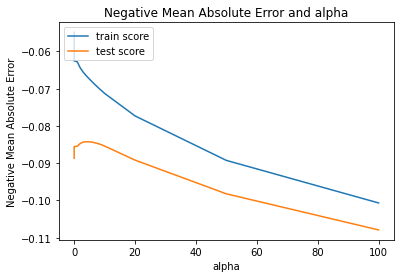

In [54]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [55]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 4.0}


In [56]:
# list of alphas to tune vs neg_mean_squared_error
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation using 5 folds with scoring factor as neg_mean_squared_error
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_squared_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [57]:
# results of the ridge regression withy cross validation
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.010403,0.001961,0.005601,1.960345e-03,0.0001,{'alpha': 0.0001},-0.012304,-0.014828,-0.023963,-0.013115,-0.039424,-0.020727,0.010235,24,-0.006323,-0.006011,-0.005531,-0.006663,-0.004838,-0.005873,0.000638
1,0.011204,0.001601,0.004001,4.101908e-07,0.001,{'alpha': 0.001},-0.012211,-0.014548,-0.023698,-0.012903,-0.039227,-0.020517,0.010225,23,-0.006326,-0.006026,-0.005536,-0.006665,-0.004839,-0.005879,0.000638
2,0.008803,0.001600,0.004001,1.196852e-06,0.01,{'alpha': 0.01},-0.011685,-0.014168,-0.022234,-0.012130,-0.038206,-0.019685,0.010011,22,-0.006383,-0.006064,-0.005632,-0.006723,-0.004872,-0.005935,0.000642
3,0.011203,0.001601,0.004001,6.143617e-07,0.05,{'alpha': 0.05},-0.010860,-0.014667,-0.020024,-0.011638,-0.036565,-0.018751,0.009471,20,-0.006616,-0.006260,-0.005942,-0.006958,-0.004979,-0.006151,0.000678
4,0.009603,0.001960,0.004001,9.464947e-07,0.1,{'alpha': 0.1},-0.010630,-0.015474,-0.019133,-0.011608,-0.035510,-0.018471,0.009037,19,-0.006873,-0.006474,-0.006227,-0.007203,-0.005068,-0.006369,0.000731


In [58]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 4.0}


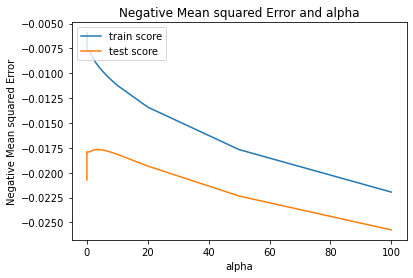

In [59]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean squared Error')
plt.title("Negative Mean squared Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [60]:
# list of alphas to tune vs R2
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation using 5 folds with scoring factor as r2 (1 - rss/tss)
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [61]:
# results of the ridge regression withy cross validation
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.009602,0.001960,0.004001,7.168434e-07,0.0001,{'alpha': 0.0001},0.923689,0.907518,0.809436,0.905286,0.710588,0.851304,0.081077,24,0.955102,0.957339,0.963045,0.954400,0.967083,0.959394,0.004899
1,0.008803,0.001601,0.004001,9.488940e-07,0.001,{'alpha': 0.001},0.924269,0.909266,0.811548,0.906818,0.712040,0.852788,0.080907,23,0.955081,0.957230,0.963011,0.954384,0.967074,0.959356,0.004908
2,0.011203,0.001600,0.003201,1.600409e-03,0.01,{'alpha': 0.01},0.927531,0.911637,0.823192,0.912395,0.719529,0.858857,0.078807,22,0.954676,0.956965,0.962371,0.953990,0.966851,0.958970,0.004918
3,0.010403,0.001960,0.004001,9.221592e-07,0.05,{'alpha': 0.05},0.932643,0.908523,0.840767,0.915948,0.731579,0.865892,0.074095,20,0.953020,0.955573,0.960299,0.952380,0.966121,0.957479,0.005141
4,0.010625,0.001735,0.004782,2.973037e-03,0.1,{'alpha': 0.1},0.934072,0.903488,0.847847,0.916170,0.739325,0.868180,0.070581,19,0.951197,0.954055,0.958395,0.950703,0.965517,0.955973,0.005499


In [62]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 4.0}


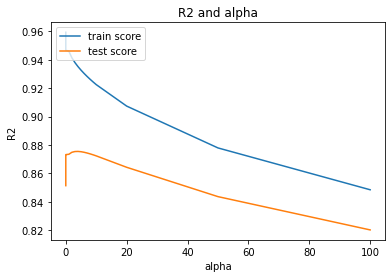

In [63]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2')
plt.title("R2 and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

alpha for all three

In [64]:
#Fitting Ridge model for alpha = 4.0 and printing coefficients which have been penalised
alpha = 4.0
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-2.32877614e-02 -1.70252911e-02  7.39237571e-02  2.34415553e-01
  2.26777080e-01  7.09423229e-03  1.38813367e-02 -5.52724475e-03
  1.43970838e-02 -2.25490053e-03 -1.47274629e-02  7.55984493e-02
  1.14676454e-01  9.97654338e-03  2.44017641e-01  1.76610001e-02
  8.39611001e-02  3.40350912e-02  2.48145022e-02  1.75691526e-29
  8.43168937e-02  4.22134236e-02 -6.76950034e-04  1.05924759e-01
  2.16678654e-02  1.30617332e-03  1.77774722e-03  6.27353393e-03
 -2.65685332e-04  6.72935448e-02  8.16365575e-02  7.39016631e-02
  6.25891296e-02  1.00933413e-01  4.63931998e-03 -7.53176948e-02
 -4.47282137e-03  8.60136096e-02  1.75929674e-02  7.98532133e-02
  9.56799426e-03 -5.37549874e-02 -1.75454986e-02 -1.62101330e-02
  3.43202372e-02 -1.36919687e-02 -4.89258571e-03  6.95632621e-04
  2.30146128e-03  2.85409195e-02 -1.41592637e-02  1.13832042e-01
 -1.12981624e-01 -2.48180094e-02 -7.06627902e-02 -8.25400958e-02
 -3.69440240e-02 -4.90612686e-02  1.04547235e-02 -5.08044950e-02
  1.09765056e-01  1.08471

In [65]:
coeffs = ridge.coef_
num_fea_ridge = len([i for i, e in enumerate(coeffs) if e != 0])
print(num_fea_ridge)

213


In [66]:
# using fitted Ridge Model to predict target variable

# on train set
y_pred_train = ridge.predict(X_train)

# on test set
y_pred_test = ridge.predict(X_test)

In [67]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

# creating a metrics to store all the results
metricRidge = []

r2_train_Ridge = r2_score(y_train, y_pred_train)
print("Train data R2 Score on Ridge Model:", r2_train_Ridge)
metricRidge.append(r2_train_Ridge)

adjusted_R2_ridge = 1 - (1-r2_train_Ridge)*((922-1)/(922-213-1))
print("Train data Adjusted R2 Score on Ridge Model:", adjusted_R2_ridge)
metricRidge.append(adjusted_R2_ridge)

r2_test_Ridge = r2_score(y_test, y_pred_test)
print("Test data R2 Score on Ridge Model:", r2_test_Ridge)
metricRidge.append(r2_test_Ridge)

rss_train_ridge = np.sum(np.square(y_train - y_pred_train))
print("Train data Residual Sum of Square on Ridge Model:",rss_train_ridge)
metricRidge.append(rss_train_ridge)

rss_test_ridge = np.sum(np.square(y_test - y_pred_test))
print("Test data Residual Sum of Square on Ridge Model:",rss_test_ridge)
metricRidge.append(rss_test_ridge)

mse_train_ridge = mean_squared_error(y_train, y_pred_train)
print("Train data Mean Square Error Score on Ridge Model:",mse_train_ridge**0.5)
metricRidge.append(mse_train_ridge**0.5)

mse_test_ridge = mean_squared_error(y_test, y_pred_test)
print("Test data Mean Square Error Score on Ridge Model:",mse_test_ridge**0.5)
metricRidge.append(mse_test_ridge**0.5)

Train data R2 Score on Ridge Model: 0.9322308166635046
Train data Adjusted R2 Score on Ridge Model: 0.9118426301512539
Test data R2 Score on Ridge Model: 0.8931645758641068
Train data Residual Sum of Square on Ridge Model: 9.055701594941892
Test data Residual Sum of Square on Ridge Model: 4.074578982021777
Train data Mean Square Error Score on Ridge Model: 0.09910500574497426
Test data Mean Square Error Score on Ridge Model: 0.11501805310051001


1. __Ridge model gives R2 score on training data as 0.93 which means it can explain 93% variance present in the data. Also Adjusted R2 score is around 0.91 though it is less than R2 score but R2 score on test data is around 0.89 which is difference around 0.04.__ 

2. __On the MSE score we can see that Mean Square Error on test data is bit higher than train data, which can explain the reduced R2 score of the test data.__

## Lasso Regression

In [68]:
# list of alphas to tune vs neg_mean_absolute_error
params = {'alpha': [ 0.00001, 0.0001, 0.0002, 0.0003, 0.0004, 
 0.0005, 0.0006, 0.0007, 0.0008, 0.0009,   0.001,  0.002,  0.003,  0.004,  0.005,  0.1]}

# creating lasso Regression model
lasso = Lasso()

# cross validation with folds =5 and scoring as neg_mean_absolute_error
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.0002, 0.0003, 0.0004,
                                   0.0005, 0.0006, 0.0007, 0.0008, 0.0009,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.1]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [69]:
# results of the ridge regression with cross validation
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=0.004]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.189643,0.044952,0.004806,1.607587e-03,0.00001,{'alpha': 1e-05},-0.080353,-0.087141,-0.088784,-0.076412,-0.095445,-0.085627,0.006654,11,-0.057203,-0.054614,-0.055662,-0.057392,-0.052604,-0.055495,0.001771
1,0.095995,0.025118,0.004002,4.909339e-07,0.0001,{'alpha': 0.0001},-0.077780,-0.090798,-0.081430,-0.076054,-0.092651,-0.083742,0.006770,6,-0.061540,-0.059127,-0.060649,-0.062140,-0.056849,-0.060061,0.001900
2,0.064817,0.014181,0.004002,5.519789e-07,0.0002,{'alpha': 0.0002},-0.079930,-0.093761,-0.080024,-0.078381,-0.093019,-0.085023,0.006860,10,-0.065472,-0.062732,-0.064085,-0.066124,-0.059461,-0.063575,0.002366
3,0.044811,0.008163,0.003202,1.600814e-03,0.0003,{'alpha': 0.0003},-0.079530,-0.093288,-0.079856,-0.079060,-0.093375,-0.085022,0.006790,9,-0.068090,-0.065135,-0.066610,-0.068766,-0.061943,-0.066109,0.002430
4,0.037350,0.005848,0.003203,1.602087e-03,0.0004,{'alpha': 0.0004},-0.078034,-0.092587,-0.078572,-0.078289,-0.093402,-0.084177,0.007206,8,-0.069659,-0.066813,-0.068672,-0.069832,-0.063895,-0.067774,0.002217


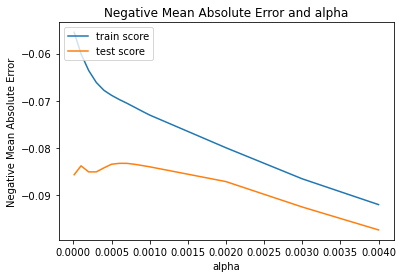

In [70]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')


In [71]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0007}


In [72]:
# list of alphas to tune vs neg_mean_absolute_error
params = {'alpha': [ 0.00001, 0.0001, 0.0002, 0.0003, 0.0004, 
 0.0005, 0.0006, 0.0007, 0.0008, 0.0009,   0.001,  0.002,  0.003,  0.004,  0.005,  0.1]}


lasso = Lasso()

# cross validation with folds =5 and scoring as neg_mean_squared_error
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_squared_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.0002, 0.0003, 0.0004,
                                   0.0005, 0.0006, 0.0007, 0.0008, 0.0009,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.1]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [73]:
# results of the ridge regression withy cross validation
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=0.004]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.183431,0.040932,0.004001,8.996946e-07,0.00001,{'alpha': 1e-05},-0.010893,-0.014132,-0.021278,-0.011235,-0.037200,-0.018947,0.009860,11,-0.006373,-0.006068,-0.005573,-0.006713,-0.004890,-0.005923,0.000638
1,0.098992,0.023355,0.004047,9.836278e-05,0.0001,{'alpha': 0.0001},-0.010105,-0.018580,-0.018425,-0.010548,-0.034097,-0.018351,0.008682,8,-0.007235,-0.006829,-0.006506,-0.007599,-0.005575,-0.006749,0.000693
2,0.063168,0.014108,0.004050,9.791855e-05,0.0002,{'alpha': 0.0002},-0.010650,-0.020683,-0.018022,-0.011414,-0.033374,-0.018829,0.008216,10,-0.008571,-0.007910,-0.007733,-0.008764,-0.006202,-0.007836,0.000904
3,0.047212,0.006996,0.002447,1.999668e-03,0.0003,{'alpha': 0.0003},-0.010756,-0.020651,-0.017363,-0.011857,-0.032538,-0.018633,0.007836,9,-0.009691,-0.008828,-0.008914,-0.009926,-0.006900,-0.008852,0.001065
4,0.036759,0.004679,0.004004,5.632737e-06,0.0004,{'alpha': 0.0004},-0.010499,-0.020382,-0.016535,-0.011579,-0.032118,-0.018222,0.007802,7,-0.010560,-0.009543,-0.009949,-0.010532,-0.007476,-0.009612,0.001134


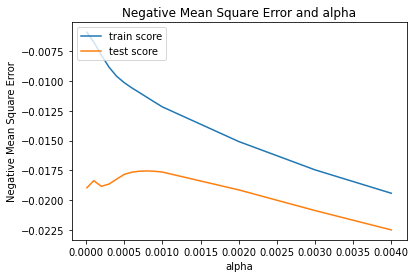

In [74]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Square Error')

plt.title("Negative Mean Square Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [75]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0008}


In [76]:
# list of alphas to tune vs r2 score
params = {'alpha': [ 0.00001, 0.0001, 0.0002, 0.0003, 0.0004, 
 0.0005, 0.0006, 0.0007, 0.0008, 0.0009,   0.001,  0.002,  0.003,  0.004,  0.005,  0.1]}


lasso = Lasso()

# cross validation with folds =5 and scoring as r2 score
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.0002, 0.0003, 0.0004,
                                   0.0005, 0.0006, 0.0007, 0.0008, 0.0009,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.1]},
             return_train_score=True, scoring='r2', verbose=1)

In [77]:
# results of the ridge regression withy cross validation
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=0.004]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.182115,0.038836,0.003629,0.000744,0.00001,{'alpha': 1e-05},0.932444,0.911863,0.830793,0.918858,0.726916,0.864175,0.077304,12,0.954742,0.956933,0.962768,0.954055,0.966731,0.959046,0.004915
1,0.100803,0.022175,0.004027,0.000113,0.0001,{'alpha': 0.0001},0.937329,0.884116,0.853478,0.923824,0.749698,0.869689,0.066895,8,0.948625,0.951534,0.956534,0.947991,0.962067,0.953350,0.005300
2,0.071800,0.014818,0.004802,0.001600,0.0002,{'alpha': 0.0002},0.933947,0.871004,0.856685,0.917566,0.755006,0.866842,0.062776,10,0.939135,0.943860,0.948336,0.940019,0.957805,0.945831,0.006814
3,0.047968,0.008024,0.003949,0.000092,0.0003,{'alpha': 0.0003},0.933290,0.871200,0.861921,0.914370,0.761140,0.868384,0.059797,9,0.931186,0.937347,0.940440,0.932067,0.953055,0.938819,0.007891
4,0.037657,0.005483,0.004003,0.000003,0.0004,{'alpha': 0.0004},0.934888,0.872882,0.868513,0.916374,0.764222,0.871376,0.059247,7,0.925015,0.932274,0.933530,0.927915,0.949135,0.933574,0.008356


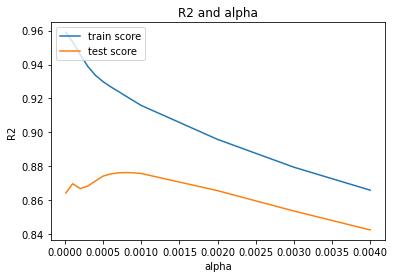

In [78]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2')
plt.title("R2 and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [79]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0008}


In [80]:
#Fitting Ridge model for alpha = 0.0008 and printing coefficients which have been penalised

alpha =0.0008

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0008)

In [81]:
coeffs = lasso.coef_
coeffs

array([-1.25004918e-02, -0.00000000e+00,  7.70202136e-02,  3.51714907e-01,
        2.73637972e-01,  0.00000000e+00,  0.00000000e+00, -1.91208440e-04,
        7.61472465e-03, -3.56396465e-03, -1.86991541e-02,  7.95128486e-02,
        0.00000000e+00, -7.09130783e-03,  4.32418766e-01,  2.08571575e-02,
        5.16108789e-02,  1.83518723e-02,  0.00000000e+00,  0.00000000e+00,
        4.87097003e-02,  1.66813294e-02,  0.00000000e+00,  1.26426873e-01,
        0.00000000e+00,  2.57236107e-03,  3.36843383e-03,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  2.31260122e-02,
       -0.00000000e+00,  1.38388672e-02,  0.00000000e+00, -3.33814056e-02,
       -3.44500838e-03,  5.45127661e-02,  0.00000000e+00,  6.14985283e-02,
        1.04271316e-02, -2.04757466e-02, -0.00000000e+00, -4.87835402e-03,
        1.39481589e-02, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  9.16599451e-03,  0.00000000e+00,  9.69826675e-02,
       -9.69147249e-02, -

In [82]:
coeffs.max()

0.432418765784842

In [83]:
# number of non zero features
num_fea_lasso = len([i for i, e in enumerate(coeffs) if e != 0])
num_fea_lasso

88

In [84]:
# using fitted Lasso Model to predict target variable

# on train data 
y_pred_train = lasso.predict(X_train)

#on test data
y_pred_test = lasso.predict(X_test)

In [85]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

# creating a metrics to store all the results
metricLasso = []


r2_train_lasso = r2_score(y_train, y_pred_train)
print("Train data R2 Score on Lasso Model:",r2_train_lasso)
metricLasso.append(r2_train_lasso)

adjusted_R2_lasso = 1 - (1-r2_train_lasso)*((922-1)/(922-88-1))
print("Train data Adjusted R2 Score on Lasso Model:", adjusted_R2_lasso)
metricLasso.append(adjusted_R2_lasso)

r2_test_lasso = r2_score(y_test, y_pred_test)
print("Test data R2 Score on Lasso Model:",r2_test_lasso)
metricLasso.append(r2_test_lasso)

rss_train_lasso = np.sum(np.square(y_train - y_pred_train))
print("Train data Residual Sum of Square on Lasso Model:",rss_train_lasso)
metricLasso.append(rss_train_lasso)

rss_test_lasso = np.sum(np.square(y_test - y_pred_test))
print("Test data Residual Sum of Square on Lasso Model:",rss_test_lasso)
metricLasso.append(rss_test_lasso)

mse_train_lasso = mean_squared_error(y_train, y_pred_train)
print("Train data Mean Square Error Score on Lasso Model:",mse_train_lasso**0.5)
metricLasso.append(mse_train_lasso**0.5)

mse_test_lasso = mean_squared_error(y_test, y_pred_test)
print("Test data Mean Square Error Score on Lasso Model:",mse_test_lasso**0.5)
metricLasso.append(mse_test_lasso**0.5)

Train data R2 Score on Lasso Model: 0.9157001304125527
Train data Adjusted R2 Score on Lasso Model: 0.9067945019327264
Test data R2 Score on Lasso Model: 0.8995914944754688
Train data Residual Sum of Square on Lasso Model: 11.26462539301891
Test data Residual Sum of Square on Lasso Model: 3.8294637713617767
Train data Mean Square Error Score on Lasso Model: 0.11053324404970055
Test data Mean Square Error Score on Lasso Model: 0.11150481573901991


1. __Lasso model gives R2 score on training data as 0.92 which means it can explain 92% variance present in the data. Also Adjusted R2 score is around 0.91 which explains the significance of the model even on higher number of features and R2 score on test data is around 0.90 which is difference around 0.02 which explains that model is able to predict 90% variance of the data in test set.__

2. __On the MSE score we can see that Mean Square Error on test data is almost similar, which can explain the very less deviation in R2 scores of both train and test.__

### Indexing all the R2, RSS and MSE scores of all three models :

In [86]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','Adjusted R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metriclm
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metricRidge, name = 'Ridge Regression')
ls_metric = pd.Series(metricLasso, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.859529,0.932231,0.915700
1,Adjusted R2 Score (Train),0.857203,0.911843,0.906795
2,R2 Score (Test),0.779032,0.893165,0.899591
3,RSS (Train),18.770590,9.055702,11.264625
4,RSS (Test),8.427452,4.074579,3.829464
5,MSE (Train),0.142683,0.099105,0.110533
6,MSE (Test),0.165414,0.115018,0.111505


Above scores explains the followings:

1. __Linear model is not correctly fitted for that there is difference between train and test R2 scores.__
2. __Lasso model performs better than Ridge model as R2 score difference between train and test is less for Lasso Model.__
3. __We can see Lasso model has less RSS and MSE for test data than Train which explains the model is significant and predict the variance more efficiently.__

## Lets observe the changes in the coefficients after regularization

In [87]:
# creating a dataframe to plot all the coefficiants of all the three models
betas = pd.DataFrame(index=X.columns)
betas.rows = X.columns

In [88]:
# assigning the coefficiants
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [89]:
# display result
betas

,Linear,Ridge,Lasso
MSSubClass,-1.296311e-02,-2.328776e-02,-0.012500
LotFrontage,6.108945e-03,-1.702529e-02,-0.000000
LotArea,9.225796e-02,7.392376e-02,0.077020
OverallQual,2.235845e-01,2.344156e-01,0.351715
OverallCond,2.598194e-01,2.267771e-01,0.273638
YearBuilt,2.875114e+00,7.094232e-03,0.000000
YearRemodAdd,1.194637e+00,1.388134e-02,0.000000
MasVnrArea,-2.680476e-03,-5.527245e-03,-0.000191
BsmtFinSF1,1.533762e-02,1.439708e-02,0.007615
BsmtFinSF2,2.050923e-03,-2.254901e-03,-0.003564


Above observations can explains follows:

1. __Linear model has lots of variation in the coefficients.__
2. __Ridge model minimizes many of features coefficients to zero but on exactly zero which correctly identifies importance of the features.__
3. __Lasso model converts many of features coefficients to zero to minimize the error, and identify the correct importance features.__

#### Top features for the Ridge and Lasso Models

Top  Ridge Model Coefficients

In [90]:
# getting top 10 positively correlated features in high to low order
Ridgecoef1 = list(ridge.coef_)
Ridgecoef1 = [round(x,3) for x in Ridgecoef1]
cols = X.columns

Ridgecoef1 = pd.DataFrame(list(zip(cols,Ridgecoef1)))
Ridgecoef1.columns = ['Features/Columns', 'Ridge Regression Coeff Positive']
Ridgecoef1.sort_values('Ridge Regression Coeff Positive',ascending=False).head(10)

,Features/Columns,Ridge Regression Coeff Positive
14,GrLivArea,0.244
3,OverallQual,0.234
4,OverallCond,0.227
101,RoofMatl_WdShngl,0.132
67,Neighborhood_StoneBr,0.121
12,1stFlrSF,0.115
51,Neighborhood_Crawfor,0.114
60,Neighborhood_NoRidge,0.110
61,Neighborhood_NridgHt,0.108
23,GarageCars,0.106


In [91]:
# getting top 10 negatively correlated features in high to low order
Ridgecoef2 = list(ridge.coef_)
Ridgecoef2 = [round(x,3) for x in Ridgecoef2]
cols = X.columns

Ridgecoef2 = pd.DataFrame(list(zip(cols,Ridgecoef2)))
Ridgecoef2.columns = ['Features/Columns', 'Ridge Regression Coeff Negative']
Ridgecoef2.sort_values('Ridge Regression Coeff Negative',ascending=True).head(10)

,Features/Columns,Ridge Regression Coeff Negative
80,Condition2_PosN,-0.134
52,Neighborhood_Edwards,-0.113
174,KitchenQual_Fa,-0.092
145,BsmtQual_TA,-0.084
55,Neighborhood_MeadowV,-0.083
176,KitchenQual_TA,-0.079
35,LotShape_IR3,-0.075
54,Neighborhood_IDOTRR,-0.071
126,Exterior2nd_Stucco,-0.068
136,ExterCond_Fa,-0.066


Above observations gives us the top 10 important features and it's coefficients as follows : 

1. GrLivArea --  (Ground living area ) --  higher the area higher the price 
2. OverallQual --  (Overall house quality) --  better the quality higher the price
3. OverallCond --  (House Condition) -- better the house condition higher the price 
4. Condition2_PosN -- (Nearby offsite area like park etc. ) --  houses having less off site area have lower price 
5. RoofMatl_WdShngl -- (Roof material is Wood Shingles ) --  houses with wood shingles have higher prices  
6. Neighborhood_StoneBr -- (Stone brook neighborhood ) --  Stone brook neighborhood have high house price
7. 1stFlrSF -- (1st Floor area ) -- more the area higher the price 
8. Neighborhood_Edwards -- (Edwards Neighborhood ) -- Edwards Neighborhood has lower house price 
9. Neighborhood_Crawfor -- (Crawford Neighborhood ) -- Crawford Neighborhood has higher house price
10. Neighborhood_NoRidge -- (Northridge Neighborhood ) -- Northridge Neighborhood has lower house price

Top Lasso Model Coefficients

In [92]:
# getting top 10 positively correlated features in high to low order
lassocoef1 = list(lasso.coef_)
lassocoef1 = [round(x,3) for x in lassocoef1]
cols = X.columns

lassocoef1 = pd.DataFrame(list(zip(cols,lassocoef1)))
lassocoef1.columns = ['Features/Columns', 'Lasso Regression Coeff Positive']
lassocoef1.sort_values('Lasso Regression Coeff Positive', ascending=False).head(10)

,Features/Columns,Lasso Regression Coeff Positive
14,GrLivArea,0.432
3,OverallQual,0.352
4,OverallCond,0.274
23,GarageCars,0.126
67,Neighborhood_StoneBr,0.120
61,Neighborhood_NridgHt,0.108
60,Neighborhood_NoRidge,0.104
66,Neighborhood_Somerst,0.100
51,Neighborhood_Crawfor,0.097
217,SaleCondition_Partial,0.097


In [93]:
# getting top 10 negatively correlated features in high to low order
lassocoef2 = list(lasso.coef_)
lassocoef2 = [round(x,3) for x in lassocoef2]
cols = X.columns

lassocoef2 = pd.DataFrame(list(zip(cols,lassocoef2)))
lassocoef2.columns = ['Features/Columns', 'Lasso Regression Coeff Negative']
lassocoef2.sort_values('Lasso Regression Coeff Negative', ascending=True).head(10)

,Features/Columns,Lasso Regression Coeff Negative
52,Neighborhood_Edwards,-0.097
80,Condition2_PosN,-0.063
174,KitchenQual_Fa,-0.062
145,BsmtQual_TA,-0.057
176,KitchenQual_TA,-0.051
54,Neighborhood_IDOTRR,-0.049
175,KitchenQual_Gd,-0.041
144,BsmtQual_Gd,-0.036
126,Exterior2nd_Stucco,-0.034
35,LotShape_IR3,-0.033


Above observations gives us the top 10 important features and it's coefficients as follows : 

1. GrLivArea --  (Ground living area ) --  higher the area higher the price 
2. OverallQual --  (Overall house quality) --  better the quality higher the price
3. OverallCond --  (House Condition) -- better the house condition higher the price 
4. GarageCars	 -- ( Garage size based on car capacity ) --  higher garage capacity have higher house prices 
5. Neighborhood_StoneBr -- (Stone brook neighborhood ) --  Stone brook neighborhood have high house price
6. Neighborhood_NridgHt -- (Northridge Heights neighborhood ) --  Northridge Heights neighborhood have high house price
7. Neighborhood_NoRidge -- (Northridge neighborhood) -- Northridge neighborhood have high house price
8. Neighborhood_Somerst -- (Somerset Neighborhood ) -- Somerset Neighborhood have high house price
9. Neighborhood_Edwards -- (Edwards Neighborhood ) -- Edwards Neighborhood has lower house price
10. SaleCondition_Partial -- (New under built house ) -- New under built house has higher house price|

### From the above observations we have indentified top 10 features from both Ridge and Lasso models.

------------------------------------------------------------------------------------------

#### Based on some different scenarios re testing the features and coefficients of the models

### Scenario 1 :

__What will be the changes in the model if we choose double the value of alpha for both ridge and lasso and What will be the most important predictor variables after the change is implemented?__

__Ridge with doubled alpha value where alpha = 4.0*2 = 8.0__

In [94]:
#Fitting Ridge model for alpha = 8.0 and printing coefficients which have been penalised
alpha = 8.0
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-2.04320509e-02 -9.53282237e-03  7.17507736e-02  2.04178660e-01
  1.92917847e-01  4.56379749e-03  9.94395273e-03 -3.99288220e-03
  1.38998634e-02 -1.76983583e-03 -1.19564385e-02  8.32970342e-02
  1.24196951e-01  1.09759706e-02  2.06148271e-01  1.76675412e-02
  8.31261994e-02  3.71662339e-02  2.80973747e-02  9.13140161e-30
  8.75067072e-02  4.12736735e-02  4.37040826e-04  9.05637483e-02
  3.30246183e-02  1.61029123e-03  2.60715583e-03  7.64368312e-03
 -1.29294812e-04  4.93867550e-02  4.20177079e-02  5.08070311e-02
  3.50002741e-02  7.19182355e-02  8.15255996e-03 -6.01496157e-02
 -7.26741397e-03  6.95061367e-02  6.04467773e-03  6.84360825e-02
  1.39852103e-02 -4.47983343e-02 -1.04700077e-02 -1.49082618e-02
  3.13341904e-02 -1.25973305e-02  8.59123041e-05  5.94061792e-03
  4.44929564e-03  2.55771931e-02 -1.85305932e-02  1.07447200e-01
 -1.07413768e-01 -2.81519726e-02 -6.68268228e-02 -6.03718021e-02
 -3.20685579e-02 -4.44590512e-02  4.11691182e-03 -4.09824319e-02
  9.33068349e-02  9.52192

In [95]:
coeffs = ridge.coef_
num_fea_ridge = len([i for i, e in enumerate(coeffs) if e != 0])
print(num_fea_ridge)

213


In [96]:
# using fitted Ridge Model to predict target variable

# on train set
y_pred_train = ridge.predict(X_train)

# on test set
y_pred_test = ridge.predict(X_test)

In [97]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

# creating a metrics to store all the results
metricRidge2 = []

r2_train_Ridge = r2_score(y_train, y_pred_train)
print("Train data R2 Score on Ridge Model:", r2_train_Ridge)
metricRidge2.append(r2_train_Ridge)

adjusted_R2_ridge = 1 - (1-r2_train_Ridge)*((922-1)/(922-213-1))
print("Train data Adjusted R2 Score on Ridge Model:", adjusted_R2_ridge)
metricRidge2.append(adjusted_R2_ridge)

r2_test_Ridge = r2_score(y_test, y_pred_test)
print("Test data R2 Score on Ridge Model:", r2_test_Ridge)
metricRidge2.append(r2_test_Ridge)

rss_train_ridge = np.sum(np.square(y_train - y_pred_train))
print("Train data Residual Sum of Square on Ridge Model:",rss_train_ridge)
metricRidge2.append(rss_train_ridge)

rss_test_ridge = np.sum(np.square(y_test - y_pred_test))
print("Test data Residual Sum of Square on Ridge Model:",rss_test_ridge)
metricRidge2.append(rss_test_ridge)

mse_train_ridge = mean_squared_error(y_train, y_pred_train)
print("Train data Mean Square Error Score on Ridge Model:",mse_train_ridge**0.5)
metricRidge2.append(mse_train_ridge**0.5)

mse_test_ridge = mean_squared_error(y_test, y_pred_test)
print("Test data Mean Square Error Score on Ridge Model:",mse_test_ridge**0.5)
metricRidge2.append(mse_test_ridge**0.5)

Train data R2 Score on Ridge Model: 0.9245724267363753
Train data Adjusted R2 Score on Ridge Model: 0.9018802330850306
Test data R2 Score on Ridge Model: 0.8986549961034446
Train data Residual Sum of Square on Ridge Model: 10.079058974555533
Test data Residual Sum of Square on Ridge Model: 3.8651807314825466
Train data Mean Square Error Score on Ridge Model: 0.10455493410510015
Test data Mean Square Error Score on Ridge Model: 0.11202360505370754


__Lasso with doubled alpha value where alpha = 0.0008*2 = 0.0016__

In [98]:
#Fitting Ridge model for alpha = 0.0016 and printing coefficients which have been penalised

alpha =0.0016

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0016)

In [99]:
coeffs = lasso.coef_
coeffs

array([-1.05331214e-02,  0.00000000e+00,  7.44058689e-02,  3.81156992e-01,
        2.26296557e-01,  0.00000000e+00,  0.00000000e+00,  3.04219614e-04,
        9.89561367e-03, -2.98285153e-03, -1.37284416e-02,  9.09718150e-02,
        0.00000000e+00, -5.35220693e-03,  4.25822025e-01,  1.62287724e-02,
        2.01881056e-02,  7.52911114e-03,  0.00000000e+00,  0.00000000e+00,
        1.98521121e-02,  1.80445012e-03,  0.00000000e+00,  1.15538706e-01,
        1.09526634e-02,  3.57638385e-03,  4.56362382e-03,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  2.95192671e-02,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -8.07682571e-03,  9.25182654e-03,  0.00000000e+00,  2.61428828e-02,
        2.91587460e-03, -0.00000000e+00, -0.00000000e+00, -6.95032955e-04,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  7.84616363e-02,
       -8.52875899e-02, -

In [100]:
num_fea_lasso = len([i for i, e in enumerate(coeffs) if e != 0])
num_fea_lasso

64

In [101]:
# using fitted Lasso Model to predict target variable

# on train data 
y_pred_train = lasso.predict(X_train)

#on test data
y_pred_test = lasso.predict(X_test)

In [102]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

# creating a metrics to store all the results
metricLasso2 = []


r2_train_lasso = r2_score(y_train, y_pred_train)
print("Train data R2 Score on Lasso Model:",r2_train_lasso)
metricLasso2.append(r2_train_lasso)

adjusted_R2_lasso = 1 - (1-r2_train_lasso)*((922-1)/(922-88-1))
print("Train data Adjusted R2 Score on Lasso Model:", adjusted_R2_lasso)
metricLasso2.append(adjusted_R2_lasso)

r2_test_lasso = r2_score(y_test, y_pred_test)
print("Test data R2 Score on Lasso Model:",r2_test_lasso)
metricLasso2.append(r2_test_lasso)

rss_train_lasso = np.sum(np.square(y_train - y_pred_train))
print("Train data Residual Sum of Square on Lasso Model:",rss_train_lasso)
metricLasso2.append(rss_train_lasso)

rss_test_lasso = np.sum(np.square(y_test - y_pred_test))
print("Test data Residual Sum of Square on Lasso Model:",rss_test_lasso)
metricLasso2.append(rss_test_lasso)

mse_train_lasso = mean_squared_error(y_train, y_pred_train)
print("Train data Mean Square Error Score on Lasso Model:",mse_train_lasso**0.5)
metricLasso2.append(mse_train_lasso**0.5)

mse_test_lasso = mean_squared_error(y_test, y_pred_test)
print("Test data Mean Square Error Score on Lasso Model:",mse_test_lasso**0.5)
metricLasso2.append(mse_test_lasso**0.5)

Train data R2 Score on Lasso Model: 0.8992075702143507
Train data Adjusted R2 Score on Lasso Model: 0.8885596304530816
Test data R2 Score on Lasso Model: 0.8971040383155974
Train data Residual Sum of Square on Lasso Model: 13.46845457227809
Test data Residual Sum of Square on Lasso Model: 3.924332459998428
Train data Mean Square Error Score on Lasso Model: 0.12086301460600284
Test data Mean Square Error Score on Lasso Model: 0.11287754052883617


In [103]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','Adjusted R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metriclm
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metricRidge2, name = 'Ridge Regression')
ls_metric = pd.Series(metricLasso2, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.859529,0.924572,0.899208
1,Adjusted R2 Score (Train),0.857203,0.901880,0.888560
2,R2 Score (Test),0.779032,0.898655,0.897104
3,RSS (Train),18.770590,10.079059,13.468455
4,RSS (Test),8.427452,3.865181,3.924332
5,MSE (Train),0.142683,0.104555,0.120863
6,MSE (Test),0.165414,0.112024,0.112878


Above scores explains the followings:

1. __After alpha is increased two times in Ridge model we can observe R2 score is reduced on train data but accordingly R2 score on test data increased by a very less margin. Adjusted R2 score also reduced.__
2. __After alpha is increased two times in Lasso model we can observe R2 score is reduced on train data also R2 score on test data remains almost same.Adjusted R2 score also reduced.__

### Increasing the value of alpha (lambda) is not increasing the model performance. As we know more the hyper parameter value the model will be prone to over-fitting and less efficient.

#### Lets observe the changes in the coefficients after regularization

In [104]:
betas2 = pd.DataFrame(index=X.columns)
betas2.rows = X.columns

In [105]:
betas2['Linear'] = lm.coef_
betas2['Ridge'] = ridge.coef_
betas2['Lasso'] = lasso.coef_

In [106]:
betas2

,Linear,Ridge,Lasso
MSSubClass,-1.296311e-02,-2.043205e-02,-0.010533
LotFrontage,6.108945e-03,-9.532822e-03,0.000000
LotArea,9.225796e-02,7.175077e-02,0.074406
OverallQual,2.235845e-01,2.041787e-01,0.381157
OverallCond,2.598194e-01,1.929178e-01,0.226297
YearBuilt,2.875114e+00,4.563797e-03,0.000000
YearRemodAdd,1.194637e+00,9.943953e-03,0.000000
MasVnrArea,-2.680476e-03,-3.992882e-03,0.000304
BsmtFinSF1,1.533762e-02,1.389986e-02,0.009896
BsmtFinSF2,2.050923e-03,-1.769836e-03,-0.002983


__Top features for the Ridge and Lasso Models__

Ridge

In [107]:
Ridgecoef1 = list(ridge.coef_)
Ridgecoef1 = [round(x,3) for x in Ridgecoef1]
cols = X.columns

Ridgecoef1 = pd.DataFrame(list(zip(cols,Ridgecoef1)))
Ridgecoef1.columns = ['Features/Columns', 'Ridge Regression Coeff Positive']
Ridgecoef1.sort_values('Ridge Regression Coeff Positive',ascending=False).head(10)

,Features/Columns,Ridge Regression Coeff Positive
14,GrLivArea,0.206
3,OverallQual,0.204
4,OverallCond,0.193
12,1stFlrSF,0.124
51,Neighborhood_Crawfor,0.107
67,Neighborhood_StoneBr,0.101
61,Neighborhood_NridgHt,0.095
60,Neighborhood_NoRidge,0.093
23,GarageCars,0.091
20,TotRmsAbvGrd,0.088


In [108]:
Ridgecoef2 = list(ridge.coef_)
Ridgecoef2 = [round(x,3) for x in Ridgecoef2]
cols = X.columns

Ridgecoef2 = pd.DataFrame(list(zip(cols,Ridgecoef2)))
Ridgecoef2.columns = ['Features/Columns', 'Ridge Regression Coeff Negative']
Ridgecoef2.sort_values('Ridge Regression Coeff Negative',ascending=True).head(10)

,Features/Columns,Ridge Regression Coeff Negative
52,Neighborhood_Edwards,-0.107
80,Condition2_PosN,-0.082
145,BsmtQual_TA,-0.077
176,KitchenQual_TA,-0.076
174,KitchenQual_Fa,-0.074
54,Neighborhood_IDOTRR,-0.067
35,LotShape_IR3,-0.060
55,Neighborhood_MeadowV,-0.060
175,KitchenQual_Gd,-0.055
143,BsmtQual_Fa,-0.053


Above observations gives us the top 10 important features and it's coefficients as follows : 

1. GrLivArea --  (Ground living area )
2. OverallQual --  (Overall house quality) 
3. OverallCond --  (House Condition) 
4. 1stFlrSF-- (1st floor area in Square feet ) 
5. Neighborhood_Crawfor -- (Crawford neighborhood) 
6. Neighborhood_Edwards -- (Edwards neighborhood )
7. Neighborhood_StoneBr -- (Stone brook neighborhood) 
8. Neighborhood_NridgHt -- (Northridge Heights Neighborhood ) 
9. Neighborhood_NoRidge -- (Northridge Neighborhood ) 
10. GarageCars -- (Garage capacity car quantity wise) 

Lasso

In [109]:
lassocoef1 = list(lasso.coef_)
lassocoef1 = [round(x,3) for x in lassocoef1]
cols = X.columns

lassocoef1 = pd.DataFrame(list(zip(cols,lassocoef1)))
lassocoef1.columns = ['Features/Columns', 'Lasso Regression Coeff Positive']
lassocoef1.sort_values('Lasso Regression Coeff Positive', ascending=False).head(10)

,Features/Columns,Lasso Regression Coeff Positive
14,GrLivArea,0.426
3,OverallQual,0.381
4,OverallCond,0.226
23,GarageCars,0.116
61,Neighborhood_NridgHt,0.096
11,TotalBsmtSF,0.091
66,Neighborhood_Somerst,0.083
51,Neighborhood_Crawfor,0.078
217,SaleCondition_Partial,0.078
2,LotArea,0.074


In [110]:
lassocoef2 = list(lasso.coef_)
lassocoef2 = [round(x,3) for x in lassocoef2]
cols = X.columns

lassocoef2 = pd.DataFrame(list(zip(cols,lassocoef2)))
lassocoef2.columns = ['Features/Columns', 'Lasso Regression Coeff Negative']
lassocoef2.sort_values('Lasso Regression Coeff Negative', ascending=True).head(10)

,Features/Columns,Lasso Regression Coeff Negative
52,Neighborhood_Edwards,-0.085
145,BsmtQual_TA,-0.048
135,ExterQual_TA,-0.032
185,FireplaceQu_NA,-0.028
151,BsmtExposure_No,-0.024
144,BsmtQual_Gd,-0.022
176,KitchenQual_TA,-0.020
169,HeatingQC_TA,-0.019
167,HeatingQC_Gd,-0.017
113,Exterior1st_Wd Sdng,-0.015


Above observations gives us the top 10 important features and it's coefficients as follows : 

1. GrLivArea --  (Ground living area ) 
2. OverallQual --  (Overall house quality) 
3. OverallCond --  (House Condition) 
4. GarageCars	 -- ( Garage size based on car capacity )  
5. Neighborhood_NridgHt -- (Northridge Heights neighborhood ) 
6. TotalBsmtSF -- (Total basement area in square foot) 
7. Neighborhood_Edwards -- (Edwards Neighborhood ) 
8. Neighborhood_Somerst -- (Somerst Neighborhood )
9. Neighborhood_Crawfor -- (Crawford Neighborhood ) 
10. SaleCondition_Partial	 -- (New under built house )

After fitting the models with doubled alpha value we see the changes in coefficients values for both Ridge and Lasso models.

__In case of top features, first 3-4 features remained same after that few new features added or removed or order of importance changes. We don't see any random changes in top features list.__

### Scenario 2 :

__if we realized that the five most important predictor variables in the lasso model are not available in the incoming data. we have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?__

#### Removing previous lasso model top 5 features : 

In [111]:
top5_lasso_features = ['GrLivArea','OverallQual','OverallCond','GarageCars','Neighborhood_StoneBr']
top5_lasso_features

['GrLivArea',
 'OverallQual',
 'OverallCond',
 'GarageCars',
 'Neighborhood_StoneBr']

In [112]:
X_train_new_lasso = X_train.drop(top5_lasso_features,axis=1)
X_train_new_lasso.shape

(922, 213)

In [113]:
#Fitting Ridge model for alpha = 0.0008 and printing coefficients which have been penalised

alpha =0.0008

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_new_lasso, y_train) 

Lasso(alpha=0.0008)

In [114]:
coeffs = lasso.coef_
coeffs

array([-0.00748448, -0.        ,  0.06251289,  0.        ,  0.        ,
       -0.00098497,  0.00884313, -0.00296558, -0.01476077,  0.0745074 ,
        0.32444596,  0.02017654,  0.00377368,  0.12865696,  0.05058867,
        0.        ,  0.        ,  0.16004583,  0.05085564,  0.        ,
        0.07486039,  0.00206139,  0.00450435,  0.00788355, -0.        ,
        0.        ,  0.        ,  0.0022129 ,  0.        ,  0.10573355,
        0.        , -0.06418294, -0.00862713,  0.07377924,  0.        ,
        0.05287912,  0.0281811 , -0.03514042, -0.        , -0.0137349 ,
        0.01016588, -0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.        ,  0.14513629, -0.11752295, -0.        ,
       -0.08826792, -0.0490533 , -0.00118426, -0.02526859, -0.        ,
       -0.        ,  0.11219117,  0.09888631, -0.00424079, -0.00349871,
        0.        , -0.        ,  0.09234286, -0.        ,  0.        ,
       -0.01592083,  0.07039009,  0.        , -0.        , -0.  

In [115]:
# number of non zero features
num_fea_lasso = len([i for i, e in enumerate(coeffs) if e != 0])
num_fea_lasso

89

In [116]:
# using fitted Lasso Model to predict target variable

# on train data 
y_pred_train = lasso.predict(X_train_new_lasso)

X_test_lasso = X_test.drop(top5_lasso_features,axis=1)
X_test_lasso.shape

#on test data
y_pred_test = lasso.predict(X_test_lasso)

In [117]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

r2_train_lasso = r2_score(y_train, y_pred_train)
print("Train data R2 Score on Lasso Model:",r2_train_lasso)

adjusted_R2_lasso = 1 - (1-r2_train_lasso)*((922-1)/(922-89-1))
print("Train data Adjusted R2 Score on Lasso Model:", adjusted_R2_lasso)

r2_test_lasso = r2_score(y_test, y_pred_test)
print("Test data R2 Score on Lasso Model:",r2_test_lasso)

rss_train_lasso = np.sum(np.square(y_train - y_pred_train))
print("Train data Residual Sum of Square on Lasso Model:",rss_train_lasso)

rss_test_lasso = np.sum(np.square(y_test - y_pred_test))
print("Test data Residual Sum of Square on Lasso Model:",rss_test_lasso)

mse_train_lasso = mean_squared_error(y_train, y_pred_train)
print("Train data Mean Square Error Score on Lasso Model:",mse_train_lasso**0.5)

mse_test_lasso = mean_squared_error(y_test, y_pred_test)
print("Test data Mean Square Error Score on Lasso Model:",mse_test_lasso**0.5)

Train data R2 Score on Lasso Model: 0.8940046182337984
Train data Adjusted R2 Score on Lasso Model: 0.8826661699439042
Test data R2 Score on Lasso Model: 0.8748071222710635
Train data Residual Sum of Square on Lasso Model: 14.16370244496892
Test data Residual Sum of Square on Lasso Model: 4.7747109389887035
Train data Mean Square Error Score on Lasso Model: 0.12394326620471725
Test data Mean Square Error Score on Lasso Model: 0.12450826576364245


In [118]:
lassocoef3 = list(lasso.coef_)
lassocoef3 = [round(x,3) for x in lassocoef3]
cols = X.columns

lassocoef3 = pd.DataFrame(list(zip(cols,lassocoef3)))
lassocoef3.columns = ['Features/Columns', 'Lasso Regression Coeff Positive']
lassocoef3.sort_values('Lasso Regression Coeff Positive', ascending=False).head(10)

,Features/Columns,Lasso Regression Coeff Positive
10,BsmtUnfSF,0.324
17,HalfBath,0.160
47,Neighborhood_BrDale,0.145
13,2ndFlrSF,0.129
56,Neighborhood_Mitchel,0.112
212,SaleType_WD,0.107
29,MSZoning_FV,0.106
177,Functional_Maj2,0.101
57,Neighborhood_NAmes,0.099
165,Heating_OthW,0.093


In [119]:
lassocoef3 = list(lasso.coef_)
lassocoef3 = [round(x,3) for x in lassocoef3]
cols = X.columns

lassocoef3 = pd.DataFrame(list(zip(cols,lassocoef3)))
lassocoef3.columns = ['Features/Columns', 'Lasso Regression Coeff Negative']
lassocoef3.sort_values('Lasso Regression Coeff Negative', ascending=True).head(10)

,Features/Columns,Lasso Regression Coeff Negative
171,Electrical_FuseF,-0.127
48,Neighborhood_BrkSide,-0.118
169,HeatingQC_TA,-0.117
50,Neighborhood_CollgCr,-0.088
140,Foundation_PConc,-0.082
131,MasVnrType_None,-0.081
75,Condition1_RRAn,-0.075
170,CentralAir_Y,-0.075
128,Exterior2nd_Wd Sdng,-0.069
31,MSZoning_RL,-0.064


Above observations gives us new lasso model the top 10 important features and it's coefficients as follows : 

1. BsmtUnfSF --  (Unfinished basement area) 
2. HalfBath --  (Half baths above grade) 
3. Neighborhood_BrDale --  (Briardale Neighborhood) 
4. 2ndFlrSF	 -- (2nd Floor Area in Sqrft )  
5. Neighborhood_NridgHt -- (Northridge Heights neighborhood ) 
6. Electrical_FuseF -- (Fair Electrical Fuse Boxes) 
7. Neighborhood_BrkSide -- (Brookside Neighborhood ) 
8. HeatingQC_TA -- (Average heating Quality )
9. Neighborhood_Mitchel -- (Mitchell Neighborhood ) 
10. SaleType_WD	 -- (Warranty Deed - Conventional)

#### From above observations we observed that, from first Lasso model when we removed top 5 features and fitted model again and predict the result, we get totally new sets of top features list. Which explains colinearity among the features can change the importance of the coefficients and features importance as well.

## Conslusion

We have used regularization techniques to implement the Ridge and Lasso regression models on our data. After applying cross validation and model fitting we calculated model metrics and importance of the coefficients. Following is observed:

1. __Lasso model performed better than Ridge model on train and test data on a slight margin. Though we can not say that Ridge model is not performed well.__

2. __Lasso model have better R2 score on test data, RSS and MSE error term are less on test data compared to Ridge Model.__

3. __Lasso model optimizes the features and trimmed out 88 top important features from total of 218 features. Which increases the model efficiency.__

__So, lets consider the Lasso Model from our analysis, where the following details are as follows:__

1. __Optimal alpha value is 0.008 , which is also known as hyper parameter in case of regularization techniques.__
2. __It explains 90% of variance present in the data correctly when tested on unknown data.__
    

__Top features which helps to predict or control the Target variable ( SalePrice ) is as follows :__

1. GrLivArea --  (Ground living area ) --  higher the area higher the price 
2. OverallQual --  (Overall house quality) --  better the quality higher the price
3. OverallCond --  (House Condition) -- better the house condition higher the price 
4. GarageCars	 -- ( Garage size based on car capacity ) --  higher garage capacity have higher house prices 
5. Neighborhood_StoneBr -- (Stone brook neighborhood ) --  Stone brook neighborhood have high house price
6. Neighborhood_NridgHt -- (Northridge Heights neighborhood ) --  Northridge Heights neighborhood have high house price
7. Neighborhood_NoRidge -- (Northridge neighborhood) -- Northridge neighborhood have high house price
8. Neighborhood_Somerst -- (Somerset Neighborhood ) -- Somerset Neighborhood have high house price
9. Neighborhood_Edwards -- (Edwards Neighborhood ) -- Edwards Neighborhood has lower house price
10. SaleCondition_Partial -- (New under built house ) -- New under built house has higher house price|

====================================== END ===================================================